In [1]:
# importing libraries
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as cm
from matplotlib.colors import hsv_to_rgb
from matplotlib.ticker import PercentFormatter,FuncFormatter
import matplotlib.ticker as mtick
from cycler import cycler
import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Loading the data 
path = './Data/'
filename ='city_code_en.csv'
filename2 = 'flow_20190121_20190301_updated.csv'
filename3 = 'flow_20200110_20200430_all.csv'

# loading city code file
df1 = pd.read_csv(path+filename,index_col='city_id')
df1.head()

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province


### Data Cleaning and Exploration

Trying to firgure out the encryption issue with column with 'Kunshan City' in the city_code_en file

In [4]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320583 Kunshan City,320000,Jiangsu Province,NaN


In [5]:
df1.drop('320583 Kunshan City',inplace=True)

In [6]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320600,Nantong city,320000,Jiangsu Province


In [7]:
df1.reset_index(drop=False,inplace=True)

In [8]:
new_entry = ['320583', 'Kunshan City', '320000','Jiangsu Province']  
df1.append(pd.Series(new_entry, index=df1.columns[:len(new_entry)]), ignore_index=True)

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province
...,...,...,...,...
385,719009,Nantou County,710000,Taiwan Province
386,719010,Chiayi County,710000,Taiwan Province
387,810000,Hong Kong,810000,Hong Kong
388,820000,Macao,820000,Macao


In [9]:
df1.head()

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province


In [10]:
name_list=df1['city_name'].tolist()

In [11]:
d =  Counter(name_list)  # -> Counter
res = [k for k, v in d.items() if v > 1]
print(res)

['Yichun', 'Suzhou City', 'Taizhou', 'Shengzhou', 'Fuzhou', 'Yulin']


In [12]:
prov=df1['pro_name'].tolist()
d =  Counter(prov)  # -> Counter
provresult = [k for k, v in d.items() if v > 1]
print(provresult)

['Hebei Province', 'Shanxi Province', 'Inner Mongolia Autonomous Region', 'Liaoning Province', 'Jilin Province', 'Heilongjiang Province', 'Jiangsu Province', 'Zhejiang Province', 'Anhui Province', 'Fujian Province', 'Jiangxi Province', 'Shandong Province', 'Henan Province', 'Hubei Province', 'Hunan Province', 'Guangdong Province', 'Guangxi Zhuang Autonomous Region', 'Hainan', 'Sichuan Province', 'Guizhou Province', 'Yunnan Province', 'Tibet Autonomous Region', 'Shaanxi Province', 'Gansu province', 'Qinghai Province', 'Ningxia Hui Autonomous Region', 'Xinjiang Uygur Autonomous Region', 'Taiwan Province']


In [13]:
df1.shape

(389, 4)

In [14]:
df1['city_id'].nunique()

389

## Data cleaning and Aggregation

In [15]:
# Reading in the mobility data
df2=pd.read_csv(path+filename2)
crs={'init':'EPSG:4326'}
df2.head()

,o_city,d_city,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,city_id_o,city_id_d
0,七台河市,万宁市,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,230900,469006
1,七台河市,三亚市,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9,230900,460200
2,七台河市,三明市,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,230900,350400
3,七台河市,三门峡市,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,230900,411200
4,七台河市,上海市,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21,230900,310000


In [16]:
df2["city_id_o"]=df2["city_id_o"].astype(int)

In [17]:
df2["city_id_d"]=df2["city_id_d"].astype(int)

In [18]:
df2["city_id_o"]=df2["city_id_o"].astype(str)

In [19]:
df2["city_id_d"]=df2["city_id_d"].astype(str)

In [20]:
df2.head()

,o_city,d_city,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,city_id_o,city_id_d
0,七台河市,万宁市,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,230900,469006
1,七台河市,三亚市,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9,230900,460200
2,七台河市,三明市,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,230900,350400
3,七台河市,三门峡市,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,230900,411200
4,七台河市,上海市,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21,230900,310000


In [21]:
df2.shape

(128239, 44)

In [22]:
df2['city_id_o'].nunique()

366

In [23]:
df2['city_id_d'].nunique()

366

In [24]:
# Dropping the columns in foreign language
df2.drop(df2.iloc[:, 0:2], axis=1, inplace=True)
df2.head()

,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,city_id_o,city_id_d
0,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,230900,469006
1,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9,230900,460200
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,230900,350400
3,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,230900,411200
4,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21,230900,310000


In [25]:
# Mapping columns with city_id_o and city_id_d with origin city and destination city in the main flows dataframe
df2["origin_city"] = df2["city_id_o"].map(df1.set_index("city_id")["city_name"])
df2["dest_city"] = df2["city_id_d"].map(df1.set_index("city_id")["city_name"])
df2["origin_province"] = df2["city_id_o"].map(df1.set_index("city_id")["pro_name"])
df2["dest_province"] = df2["city_id_d"].map(df1.set_index("city_id")["pro_name"])

In [26]:
df2['city_id_o'].nunique()

366

In [27]:
df2['city_id_d'].nunique()

366

In [28]:
df2['origin_city'].nunique()

356

In [29]:
df2['origin_province'].nunique()

31

In [30]:
df2.head()

,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,city_id_o,city_id_d,origin_city,dest_city,origin_province,dest_province
0,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,230900,469006,Qitaihe,Wanning,Heilongjiang Province,Hainan
1,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9,230900,460200,Qitaihe,Sanya,Heilongjiang Province,Hainan
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,230900,350400,Qitaihe,Sanming,Heilongjiang Province,Fujian Province
3,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,230900,411200,Qitaihe,Sanmenxia,Heilongjiang Province,Henan Province
4,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21,230900,310000,Qitaihe,Shanghai,Heilongjiang Province,Shanghai


In [31]:
df2["origin_city"] = df2["origin_city"].str.replace("City","")
df2["origin_province"] = df2["origin_province"].str.replace("Province","")
df2["dest_city"] = df2["dest_city"].str.replace("City","")
df2["dest_province"] = df2["dest_province"].str.replace("Province","")

In [32]:
df2['origin_city'].nunique()

356

In [33]:
df2['city_id_o'].nunique()

366

In [34]:
# Reordering the dataframe for better layout 
cols_to_order=['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d']
new_columns = cols_to_order + (df2.columns.drop(cols_to_order).tolist())
df2=df2[new_columns]
df2.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
1,Qitaihe,Heilongjiang,230900,Sanya,Hainan,460200,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9
2,Qitaihe,Heilongjiang,230900,Sanming,Fujian,350400,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Qitaihe,Heilongjiang,230900,Sanmenxia,Henan,411200,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,Qitaihe,Heilongjiang,230900,Shanghai,Shanghai,310000,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21


In [35]:
df2.shape

(128239, 46)

In [36]:
# Aggregating weekly data for the whole data file
a= df2.set_index(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d']).rename(columns=lambda x: pd.to_datetime(x))
a = a.resample('W', axis=1).sum().reset_index()
a.head(20)

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,2019-01-27 00:00:00,2019-02-03 00:00:00,2019-02-10 00:00:00,2019-02-17 00:00:00,2019-02-24 00:00:00,2019-03-03 00:00:00
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,6,1,1,0,4,0
1,Qitaihe,Heilongjiang,230900,Sanya,Hainan,460200,93,70,67,69,74,39
2,Qitaihe,Heilongjiang,230900,Sanming,Fujian,350400,0,1,0,1,1,0
3,Qitaihe,Heilongjiang,230900,Sanmenxia,Henan,411200,3,1,0,0,0,2
4,Qitaihe,Heilongjiang,230900,Shanghai,Shanghai,310000,67,56,194,230,164,106
5,Qitaihe,Heilongjiang,230900,Shangrao,Jiangxi,361100,0,0,1,0,4,1
6,Qitaihe,Heilongjiang,230900,Dongfang,Hainan,469007,9,7,1,1,7,4
7,Qitaihe,Heilongjiang,230900,Dongguan city,Guangdong,441900,2,12,16,27,37,14
8,Qitaihe,Heilongjiang,230900,Dongying,Shandong,370500,6,9,48,33,43,20
9,Qitaihe,Heilongjiang,230900,Zhongwei,Ningxia Hui Autonomous Region,640500,0,0,0,3,2,1


In [37]:
a.shape

(128239, 12)

In [38]:
old_names = a.columns.tolist()
old_names

['origin_city',
 'origin_province',
 'city_id_o',
 'dest_city',
 'dest_province',
 'city_id_d',
 Timestamp('2019-01-27 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-03 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-10 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-17 00:00:00', freq='W-SUN'),
 Timestamp('2019-02-24 00:00:00', freq='W-SUN'),
 Timestamp('2019-03-03 00:00:00', freq='W-SUN')]

In [39]:
new_names = ['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d','Week1','Week2','Week3','Week4','Week5','Week6'] 

In [40]:
a = a.rename(columns=dict(zip(old_names, new_names))) 
a.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,6,1,1,0,4,0
1,Qitaihe,Heilongjiang,230900,Sanya,Hainan,460200,93,70,67,69,74,39
2,Qitaihe,Heilongjiang,230900,Sanming,Fujian,350400,0,1,0,1,1,0
3,Qitaihe,Heilongjiang,230900,Sanmenxia,Henan,411200,3,1,0,0,0,2
4,Qitaihe,Heilongjiang,230900,Shanghai,Shanghai,310000,67,56,194,230,164,106


In [41]:
#saving the weekly aggregated file
#a.to_csv('./Data/weekly_aggregation_final.csv',index=False)

### Descriptive Statistics

In [43]:
#Total sum per column: 
totl=a.copy()
tot=totl.drop(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d'],axis=1)
tot.loc['Total',:]= totl.sum(axis=0)

#Total sum per row: 
tot.loc[:,'Total'] = totl.sum(axis=1)
#tot.to_csv('./Data/summarytables/total_sum_by_column2019.csv',index=False)

In [44]:
tot.tail(1)

,Week1,Week2,Week3,Week4,Week5,Week6,Total
Total,120740644.0,140646740.0,160636740.0,137572668.0,110764807.0,64425419.0,NaN


In [67]:
# Total sum by Origin City 
orig_city_sum=a.groupby(['origin_city'])[["Week1", "Week2", "Week3","Week4","Week5","Week6"]].sum().reset_index()
orig_city_sum.tail(5)
#orig_city_sum.to_csv('./Data/summarytables/2019/total_sum_by_origin_city_2019.csv',index=False)

In [68]:
# Total sum by Destination City 
dest_city_sum=a.groupby(['dest_city'])[["Week1", "Week2", "Week3","Week4","Week5","Week6"]].sum().reset_index()
#dest_city_sum.to_csv('./Data/summarytables/2019/total_sum_by_destination_city_2019.cs',index=False)
dest_city_sum.tail(5)

,dest_city,Week1,Week2,Week3,Week4,Week5,Week6
351,Zhuzhou,489841,511722,528999,434842,285382,165194
352,Zibo,293843,330122,413203,325423,342049,201893
353,Zigong,280331,441452,435993,244044,168347,91725
354,Ziyang,310189,604423,478268,221660,148814,86375
355,Zunyi,612930,656832,711859,484915,353067,211142


In [69]:
# Total sum by Origin Province 
orig_prov_sum=a.groupby(['origin_province'])[["Week1", "Week2", "Week3","Week4","Week5","Week6"]].sum().reset_index()
#orig_prov_sum.to_csv('./Data/summarytables/2019/total_sum_by_origin_province2019.csv',index=False)
orig_prov_sum.tail(5)

,origin_province,Week1,Week2,Week3,Week4,Week5,Week6
26,Tianjin,1224030,1551532,1045197,737392,789777,585040
27,Tibet Autonomous Region,208070,192360,155570,176305,155790,114358
28,Xinjiang Uygur Autonomous Region,1576490,1563991,1706833,1344535,1303278,901996
29,Yunnan,3241529,3802311,5257346,4244818,3319837,2018905
30,Zhejiang,10190059,8510774,6587162,4905953,4460718,3060671


In [70]:
# Total sum by Destination Province 
dest_prov_sum=a.groupby(['dest_province'])[["Week1", "Week2", "Week3","Week4","Week5","Week6"]].sum().reset_index()
#dest_prov_sum.to_csv('./Data/summarytables/2019/total_sum_by_destination_province2019.csv',index=False)
dest_prov_sum.tail(5)

,dest_province,Week1,Week2,Week3,Week4,Week5,Week6
26,Tianjin,833336,698423,1392896,1430329,1277495,749357
27,Tibet Autonomous Region,163846,159521,144804,183700,183640,142043
28,Xinjiang Uygur Autonomous Region,1364137,1390599,1717571,1466556,1460611,994070
29,Yunnan,3404662,3815235,5352468,4090576,3178577,1968268
30,Zhejiang,5015133,4927929,7549944,8797605,7652027,4045490


In [71]:
# Percentage by origin city 
tot_orig_perc=a.groupby(['origin_city','origin_province']).sum().reset_index()
#tot_orig_perc.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_orig_perc.loc[:,'Week1':].values)
tot_orig_perc['Percent'] = tot_orig_perc.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_orig_perc.to_csv('./Data/summarytables/2019/total_origin_perc2019.csv',index=False)
tot_orig_perc

,origin_city,origin_province,city_id_o,Week1,Week2,Week3,Week4,Week5,Week6,Percent
0,of Yantai,Shandong,134527800,349809,441869,544493,335515,311593,191355,0.295954
1,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,172948400,86232,80165,106477,91383,68777,43495,0.064853
2,Aksu region,Xinjiang Uygur Autonomous Region,231126600,84157,69190,64153,61626,66397,47785,0.053527
3,Ali area,Tibet Autonomous Region,113382500,2185,2150,846,1482,1778,1543,0.001359
4,Altay region,Xinjiang Uygur Autonomous Region,214610400,35862,30230,40251,35151,32988,20580,0.026547
...,...,...,...,...,...,...,...,...,...,...
360,Zhuzhou,Hunan,154441800,287318,387424,557427,464885,307250,165873,0.295348
361,Zibo,Shandong,134418900,325968,359830,459489,327541,333082,202004,0.273265
362,Zigong,Sichuan,185238900,161535,210299,469600,402730,253685,123827,0.220700
363,Ziyang,Sichuan,186368000,167176,250556,653914,453555,248810,110819,0.256514


In [47]:
# Percentage by destination city
tot_dest_perc=a.groupby(['dest_city','dest_province']).sum().reset_index()
#tot_orig_perc.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_dest_perc.loc[:,'Week1':].values)
tot_dest_perc['Percent'] = tot_dest_perc.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_dest_perc.to_csv('./Data/summarytables/total_dest_perc2019.csv',index=False)
tot_dest_perc

,dest_city,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Percent
0,of Yantai,Shandong,284245,398413,507536,351080,388912,220814,0.292738
1,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,80730,91568,116092,92368,83858,48065,0.069773
2,Aksu region,Xinjiang Uygur Autonomous Region,72083,67683,69577,77241,81243,54981,0.057542
3,Ali area,Tibet Autonomous Region,1282,1064,668,1538,1830,1158,0.001026
4,Altay region,Xinjiang Uygur Autonomous Region,29011,31944,32348,26674,27152,18423,0.022531
...,...,...,...,...,...,...,...,...,...
360,Zhuzhou,Hunan,489841,511722,528999,434842,285382,165194,0.328800
361,Zibo,Shandong,293843,330122,413203,325423,342049,201893,0.259467
362,Zigong,Sichuan,280331,441452,435993,244044,168347,91725,0.226173
363,Ziyang,Sichuan,310189,604423,478268,221660,148814,86375,0.251737


In [152]:
# Percentage by origin province
tot_orig_percprov=a.groupby(['origin_province']).sum().reset_index()
#tot_orig_percprov.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_orig_percprov.loc[:,'Week1':].values)
tot_orig_percprov['Percent'] = tot_orig_percprov.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_orig_percprov.to_csv('./Data/summarytables/total_orig_provperc2019.csv',index=False)
tot_orig_percprov

,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Percent
0,Anhui,4146044,5436294,8580563,8829892,6074171,2864078,4.889994
1,Beijing,3640793,5580160,2480543,1994618,2080230,1655382,2.372351
2,Chongqing,1236671,1931706,2724911,2343468,1617489,866757,1.459063
3,Fujian,3679841,4136760,4177292,3849956,2850738,1539625,2.753752
4,Gansu province,1444135,1635257,2210404,2106234,1846120,1011810,1.395501
5,Guangdong,21507903,21259278,15702608,13385811,10813126,7367704,12.253405
6,Guangxi Zhuang Autonomous Region,3083604,3958685,6718926,6034463,3828431,2048398,3.493871
7,Guizhou,2876035,3452444,4999953,4088175,3724978,2137205,2.895913
8,Hainan,1697313,1929257,2206275,1941299,1663372,941497,1.412520
9,Hebei,4581261,4440588,6546691,5434125,5272834,3140278,4.003307


In [153]:
# Percentage by destination province
tot_dest_percprov=a.groupby(['dest_province']).sum().reset_index()
#tot_orig_percprov.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_dest_percprov.loc[:,'Week1':].values)
tot_dest_percprov['Percent'] = tot_dest_percprov.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_dest_percprov.to_csv('./Data/summarytables/total_dest_provperc2019.csv',index=False)
tot_dest_percprov

,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Percent
0,Anhui,7095335,9678420,7685487,5621318,4132655,2330223,4.973337
1,Beijing,2322520,1691999,4139897,4346897,3649468,2111502,2.485385
2,Chongqing,2023684,2157006,2723452,1912960,1283188,678324,1.466903
3,Fujian,2937364,3830426,4430376,4038939,3151889,1685595,2.732028
4,Gansu province,1738214,2067947,2023908,1820223,1672094,926554,1.394818
5,Guangdong,12353526,13474920,19086745,22344864,15574224,8916157,12.486671
6,Guangxi Zhuang Autonomous Region,5057720,6031526,6214955,3990419,3003045,1788177,3.550123
7,Guizhou,3957729,3881692,4764730,3563107,2980530,1725206,2.840686
8,Hainan,1617800,1966105,2171209,1833265,1680226,952555,1.391037
9,Hebei,4772768,6061729,5321370,4434517,4680117,3012097,3.849088


In [42]:
a.shape

(128239, 12)

In [43]:
a['city_id_o'].dtype

dtype('O')

In [44]:
a['city_id_o']=a['city_id_o'].astype(int)

In [45]:
a.describe()

,city_id_o,Week1,Week2,Week3,Week4,Week5,Week6
count,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000
mean,409119.653943,941.528271,1096.754809,1252.635626,1072.783381,863.737295,502.385538
std,147989.797544,7375.376500,8725.892011,9020.261041,7931.576231,6778.063284,4464.870685
min,110000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330400.000000,5.000000,4.000000,5.000000,6.000000,6.000000,3.000000
50%,421300.000000,28.000000,28.000000,30.000000,33.000000,32.000000,18.000000
75%,512000.000000,153.000000,160.000000,183.000000,185.000000,164.000000,90.000000
max,659009.000000,559990.000000,538900.000000,506995.000000,516312.000000,475174.000000,377307.000000


In [46]:
a['origin_city'].nunique()

356

In [47]:
# Aggregating by month
a_m= df2.set_index(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d']).rename(columns=lambda x: pd.to_datetime(x))
a_m = a_m.resample('M', axis=1).sum().reset_index()
a_m.head(20)

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,7,5,0
1,Qitaihe,Heilongjiang,230900,Sanya,Hainan,460200,140,263,9
2,Qitaihe,Heilongjiang,230900,Sanming,Fujian,350400,1,2,0
3,Qitaihe,Heilongjiang,230900,Sanmenxia,Henan,411200,3,3,0
4,Qitaihe,Heilongjiang,230900,Shanghai,Shanghai,310000,92,704,21
5,Qitaihe,Heilongjiang,230900,Shangrao,Jiangxi,361100,0,6,0
6,Qitaihe,Heilongjiang,230900,Dongfang,Hainan,469007,14,15,0
7,Qitaihe,Heilongjiang,230900,Dongguan city,Guangdong,441900,8,99,1
8,Qitaihe,Heilongjiang,230900,Dongying,Shandong,370500,14,144,1
9,Qitaihe,Heilongjiang,230900,Zhongwei,Ningxia Hui Autonomous Region,640500,0,6,0


In [48]:
# Describing the aggregation by week
a.describe()

,city_id_o,Week1,Week2,Week3,Week4,Week5,Week6
count,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000,128239.000000
mean,409119.653943,941.528271,1096.754809,1252.635626,1072.783381,863.737295,502.385538
std,147989.797544,7375.376500,8725.892011,9020.261041,7931.576231,6778.063284,4464.870685
min,110000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330400.000000,5.000000,4.000000,5.000000,6.000000,6.000000,3.000000
50%,421300.000000,28.000000,28.000000,30.000000,33.000000,32.000000,18.000000
75%,512000.000000,153.000000,160.000000,183.000000,185.000000,164.000000,90.000000
max,659009.000000,559990.000000,538900.000000,506995.000000,516312.000000,475174.000000,377307.000000


In [49]:
# Describing the aggregation by week
a_m.describe()

,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00
count,128239.000000,1.282390e+05,128239.000000
mean,1562.419670,4.052926e+03,114.479230
std,11953.158825,2.955045e+04,1110.441706
min,0.000000,0.000000e+00,0.000000
25%,8.000000,2.300000e+01,0.000000
50%,46.000000,1.300000e+02,3.000000
75%,252.000000,7.095000e+02,17.000000
max,797103.000000,1.709306e+06,99171.000000


In [50]:
#df2.to_csv('./Data/final_file.csv')

In [51]:
df2['city_id_o'].nunique()

366

In [52]:
df2['origin_city'].nunique()

356

### Data Manipulation for Mapping

Getting flows and locations files for the Flowmap visualizations

In [53]:
# Pivoting the data file 
visual_df=df2.set_index(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d']).stack().reset_index().rename(columns = {'level_6' : 'Date', 0: 'Val'})
visual_df.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Date,Val
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,20190121,0
1,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,20190122,0
2,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,20190123,1
3,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,20190124,1
4,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,20190125,2


In [54]:
visual_df['Date'].dtypes

dtype('O')

In [55]:
visual_df.shape

(5129560, 8)

In [56]:
# converting to datetime format
visual_df['Date'] = pd.to_datetime(visual_df['Date'], format= '%Y/%m/%d')

In [57]:
visual_df.dtypes

origin_city                object
origin_province            object
city_id_o                  object
dest_city                  object
dest_province              object
city_id_d                  object
Date               datetime64[ns]
Val                         int64
dtype: object

In [58]:
#Total number of traveling devices by week
total_by_week=visual_df.groupby(visual_df.Date.dt.strftime('%W')).Val.sum().reset_index()
#total_by_week.to_csv('./Data/summarytables/total_by_week2019.csv',index=False)
total_by_week

,Date,Val
0,03,120740644
1,04,140646740
2,05,160636740
3,06,137572668
4,07,110764807
5,08,64425419


In [60]:
total=total_by_week['Val'].sum()
total

734787018

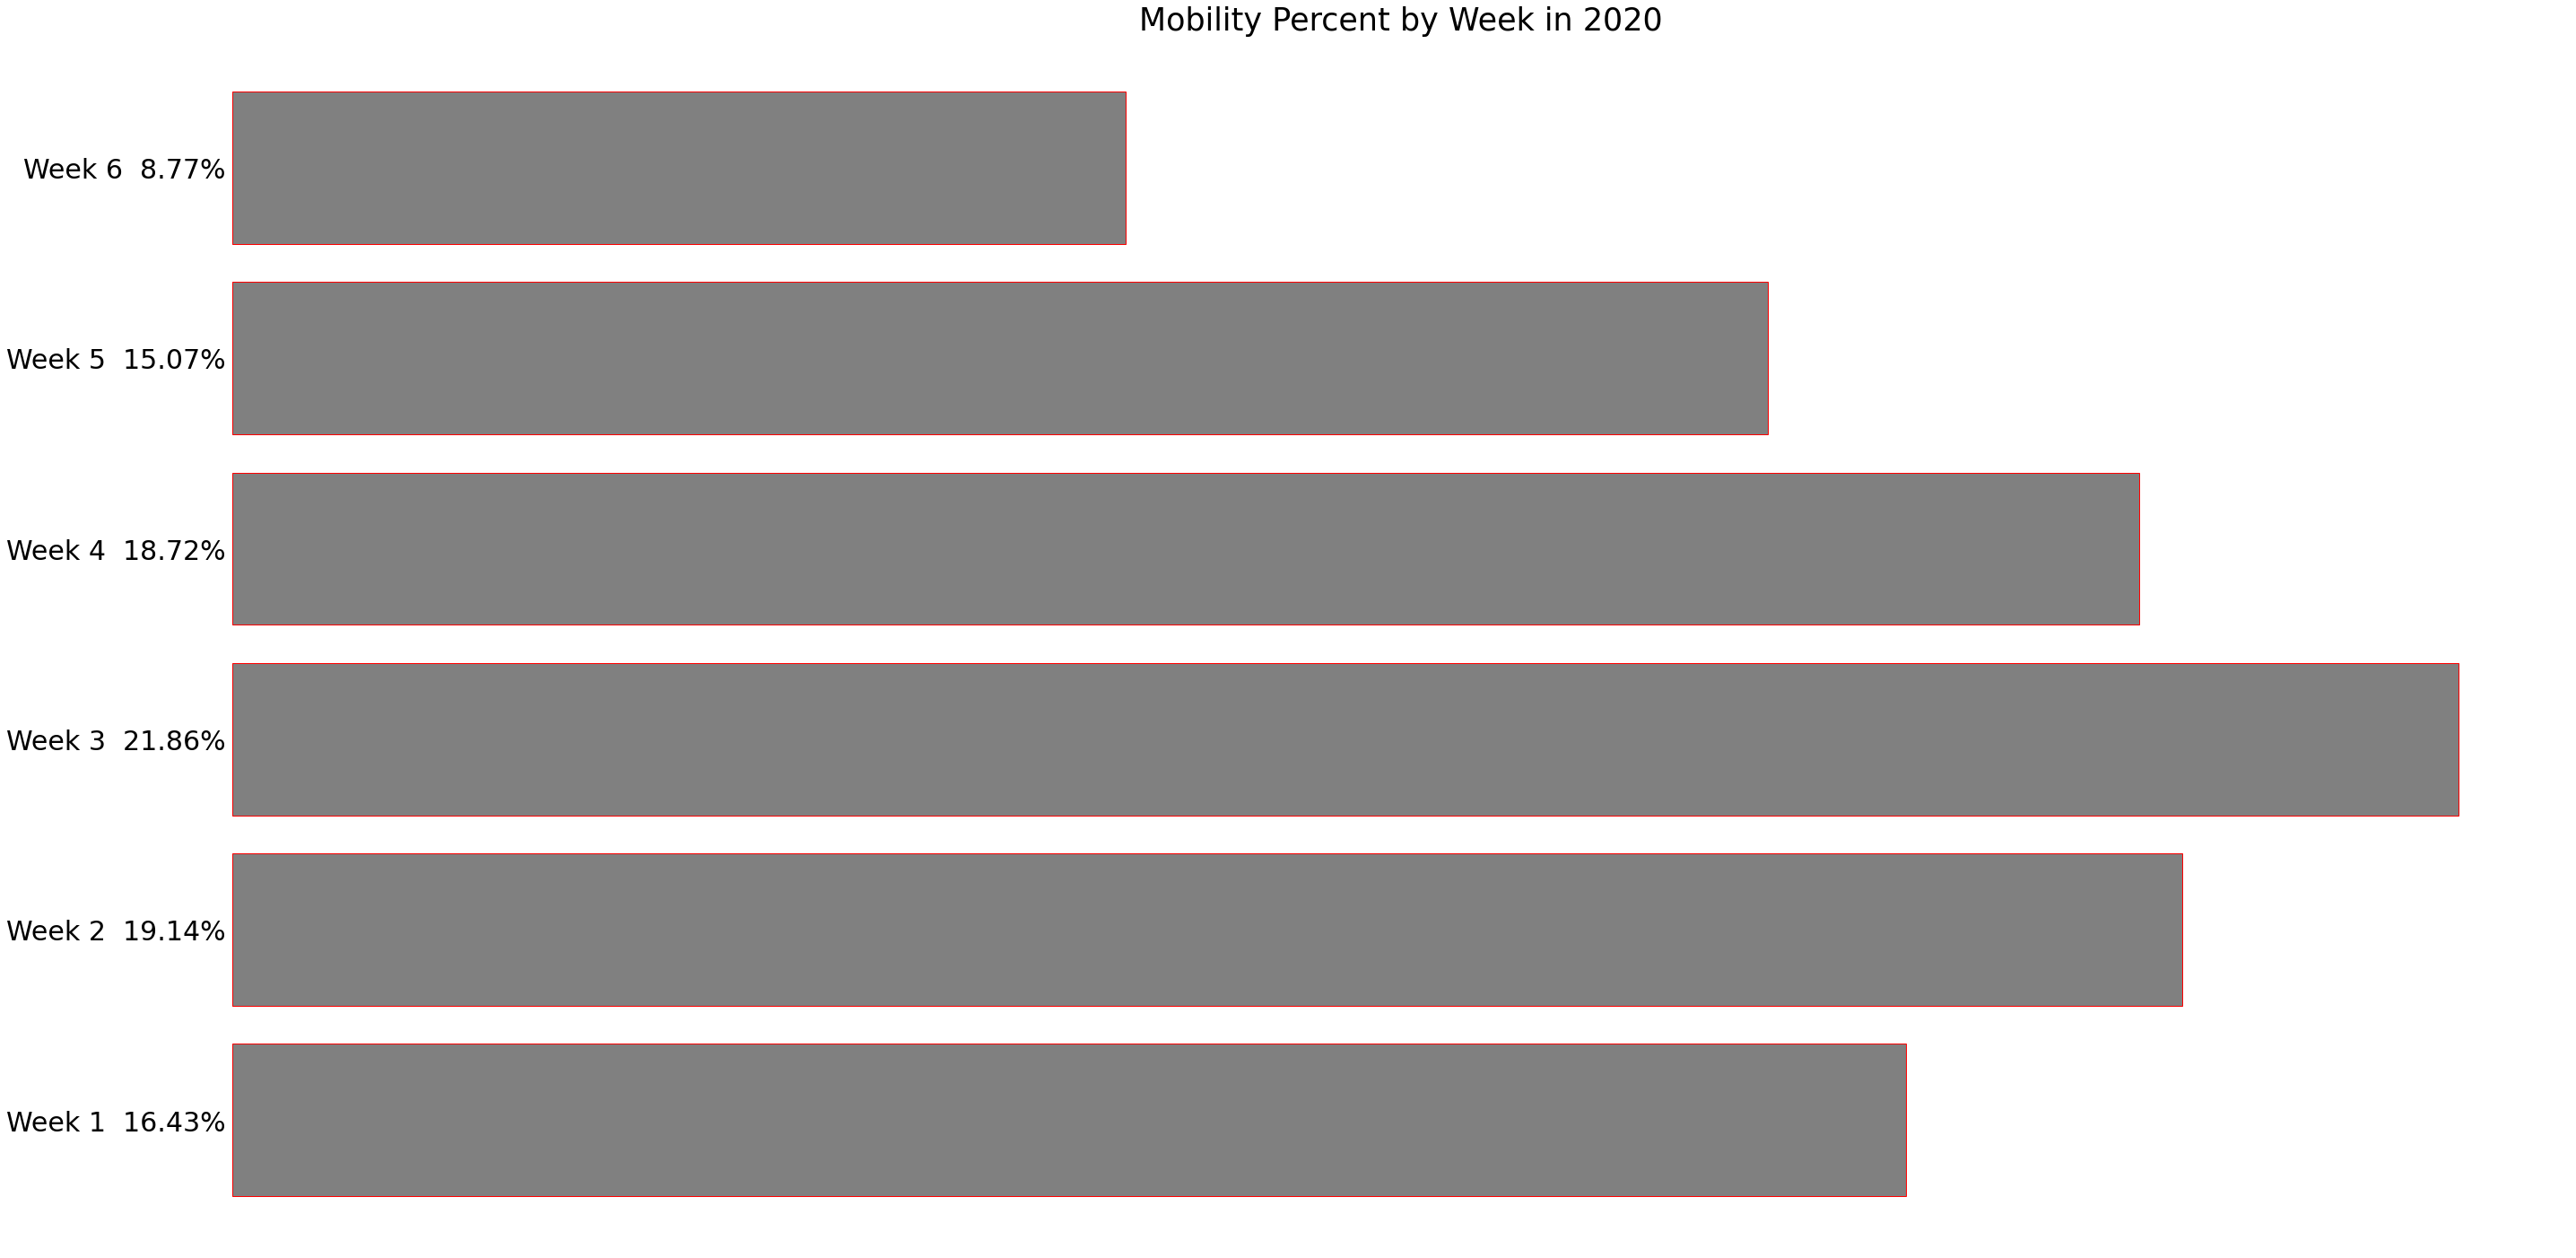

In [61]:
# Bar plot by percentage
fig, ax = plt.subplots(figsize=(40, 20))

percent = total_by_week['Val']/total*100
weeks=['Week 1','Week 2','Week 3','Week 4','Week 5','Week 6']
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(weeks, percent)]

plt.barh(weeks, total_by_week['Val'], color='gray', edgecolor='red')
plt.yticks(range(len(weeks)), new_labels,fontsize=30)
ax.set_title('Mobility Percent by Week in 2020', fontsize=35)
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", left=False)
#plt.savefig('./Media/MobilityPerc_by_week_2019.png')
plt.show()

In [176]:
visual_df.shape

(5129560, 8)

In [177]:
visual_df.describe()

,Val
count,5.129560e+06
mean,1.432456e+02
std,1.158907e+03
min,0.000000e+00
25%,0.000000e+00
50%,4.000000e+00
75%,2.300000e+01
max,1.093710e+05


In [68]:
# Aggregating the whole data set by weekly and starting with every Monday to reduce and visualize it better
df_final = (visual_df
     .reset_index()
     .set_index("Date")
     .groupby(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d',pd.Grouper(freq='D')])["Val"].sum()
     .astype(int)
     .reset_index())
df_final.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Date,Val
0,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-21,0
1,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-22,0
2,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-23,0
3,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-24,0
4,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-25,0


In [65]:
# Aggregating the whole data set by weekly and starting with every Monday to reduce and visualize it better
df_finalW = (visual_df
     .reset_index()
     .set_index("Date")
     .groupby(['origin_city','origin_province','city_id_o','dest_city','dest_province','city_id_d',pd.Grouper(freq='W-MON')])["Val"].sum()
     .astype(int)
     .reset_index())
df_finalW.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Date,Val
0,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-21,0
1,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-01-28,1
2,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-02-04,10
3,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-02-11,9
4,of Yantai,Shandong,370600,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,2019-02-18,4


In [66]:
df_finalW.shape

(897673, 8)

In [181]:
df_total=df_finalW.groupby(['Date']).agg({'Val':['sum']}).reset_index()
df_total.columns=['Date','Mobility']
total = np.sum(df_total.loc[:,'Mobility':].values)
df_total['Percent'] = df_total.loc[:,'Mobility':].sum(axis=1)/total * 100
#df_total.to_csv('./Data/summarytables/total_perc_by_week2019.csv',index=False)
df_total

,Date,Mobility,Percent
0,2019-01-21,13946031,1.897969
1,2019-01-28,126285511,17.186682
2,2019-02-04,133394857,18.154221
3,2019-02-11,171549461,23.346828
4,2019-02-18,129748977,17.658039
5,2019-02-25,108364005,14.747675
6,2019-03-04,51498176,7.008585


In [182]:
df_final.shape

(5129560, 8)

In [ ]:
# Reducing the data shape to filter out the lowest values for the mobility
df_mapping = df_final[~(df_final['Val'] < 50)]  
df_mapping.head()

In [184]:
df_date=df_mapping.groupby(['Date']).agg({'Val':['sum']}).reset_index()

In [185]:
df_date.columns=['Date','Mobility']
df_date.head()

,Date,Mobility
0,2019-01-21,13221256
1,2019-01-22,14221446
2,2019-01-23,14959287
3,2019-01-24,15883248
4,2019-01-25,18891636


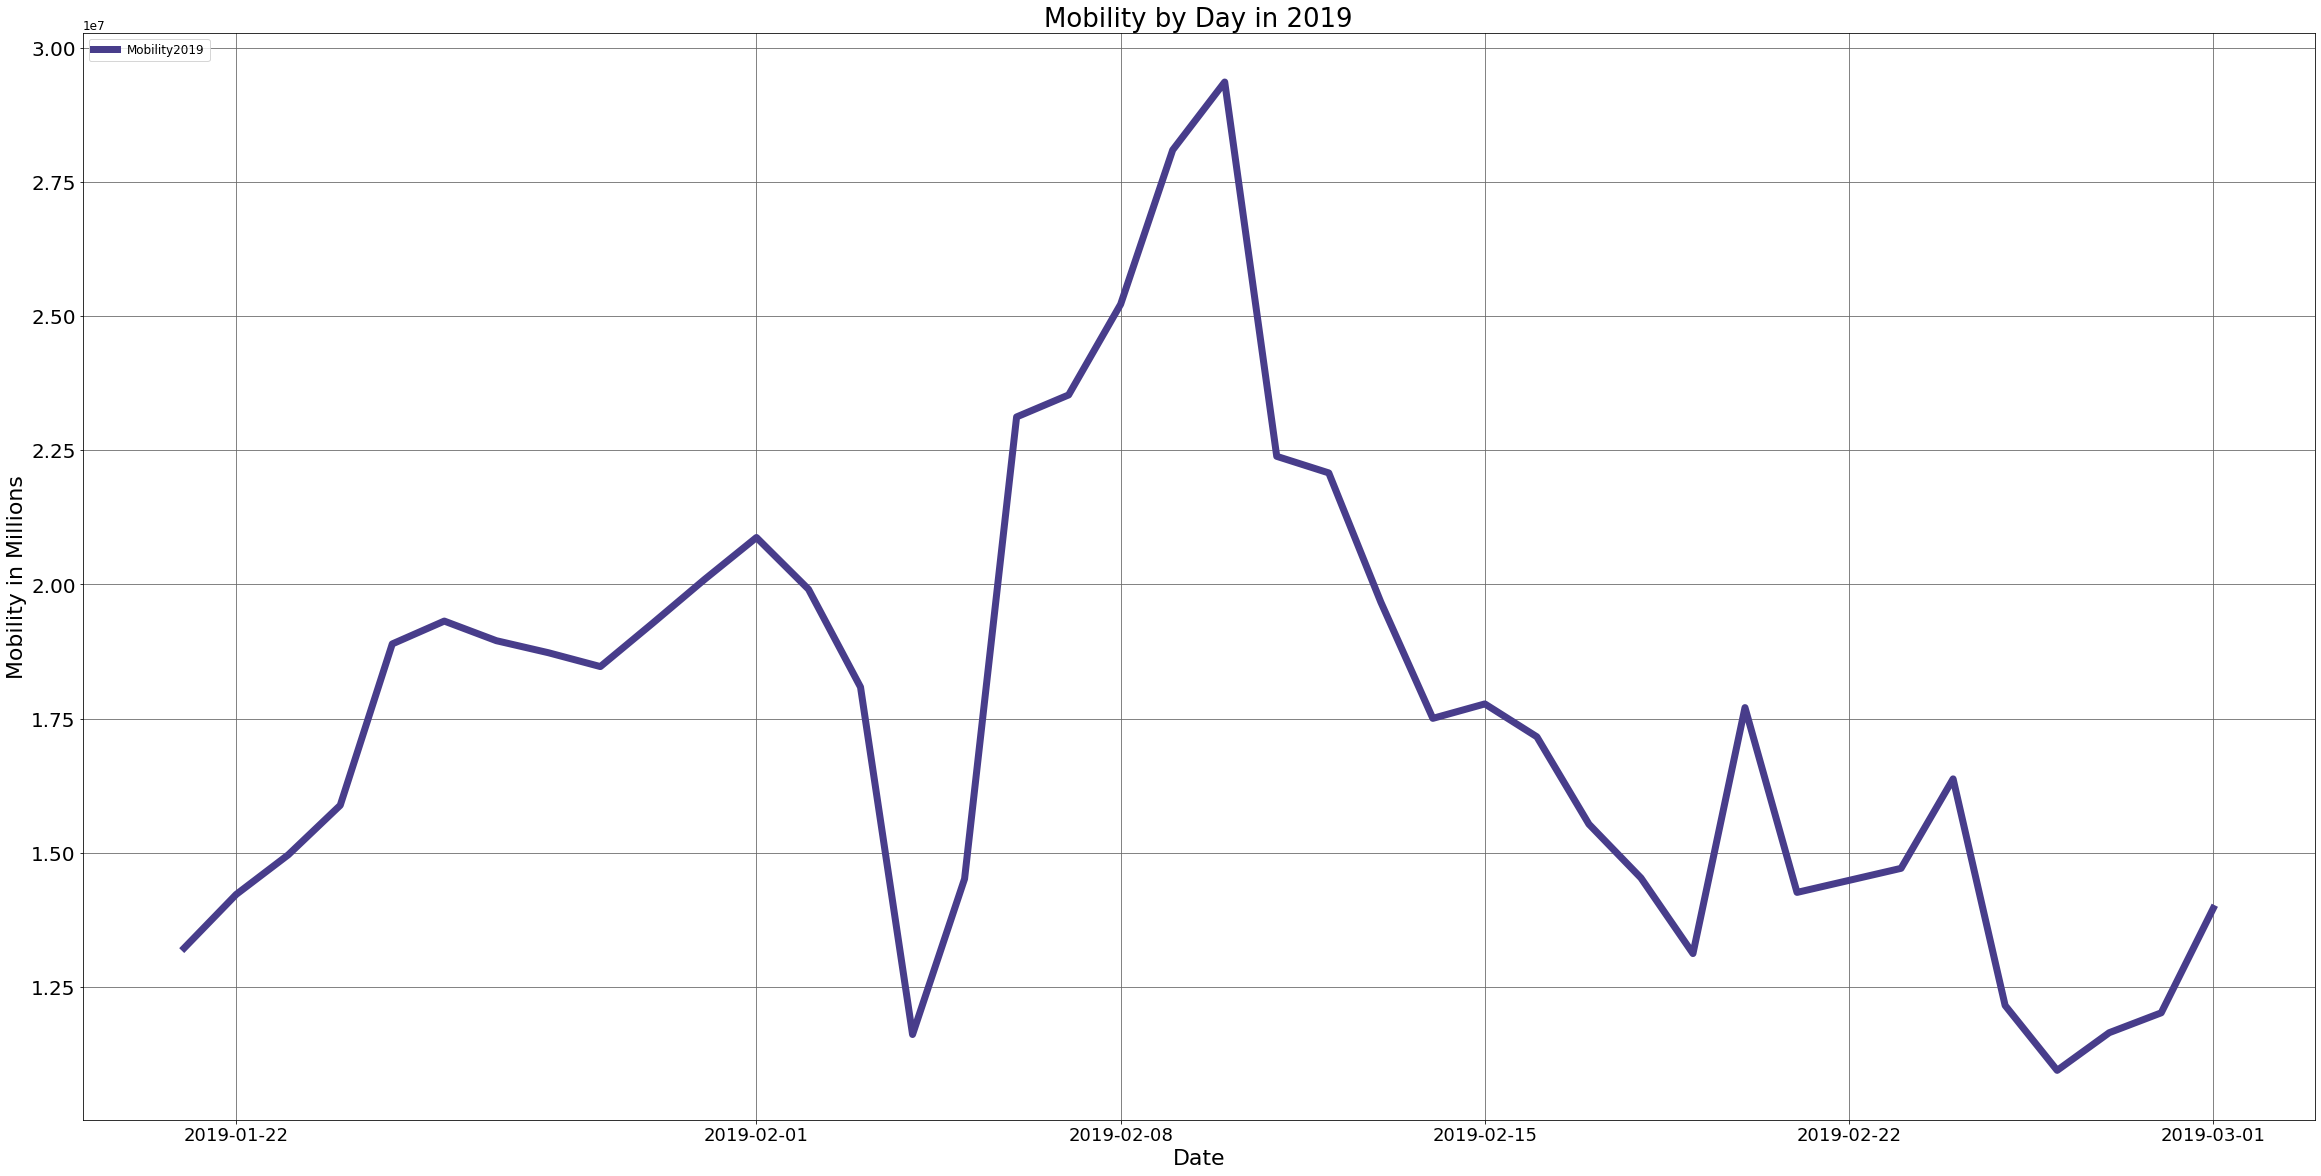

In [186]:
# Time series plot by day
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(40, 20))
df_date.reset_index()
# Specify how our lines should look
ax.plot(df_date.Date, df_date.Mobility, color='darkslateblue', label='Mobility2019',linewidth = 7)
# Same as above
ax.set_xlabel('Date', fontsize=22)
ax.set_ylabel('Mobility in Millions', fontsize=22)
ax.set_title('Mobility by Day in 2019', fontsize=26)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
ax.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/Mobility_by_day_2019.png')
ax.legend(loc='upper left');

In [69]:
df_dateW=df_finalW.groupby(['Date']).agg({'Val':['sum']}).reset_index()

In [70]:
df_dateW.columns=['Date','Mobility']
df_dateW.head()

,Date,Mobility
0,2019-01-21,13946031
1,2019-01-28,126285511
2,2019-02-04,133394857
3,2019-02-11,171549461
4,2019-02-18,129748977


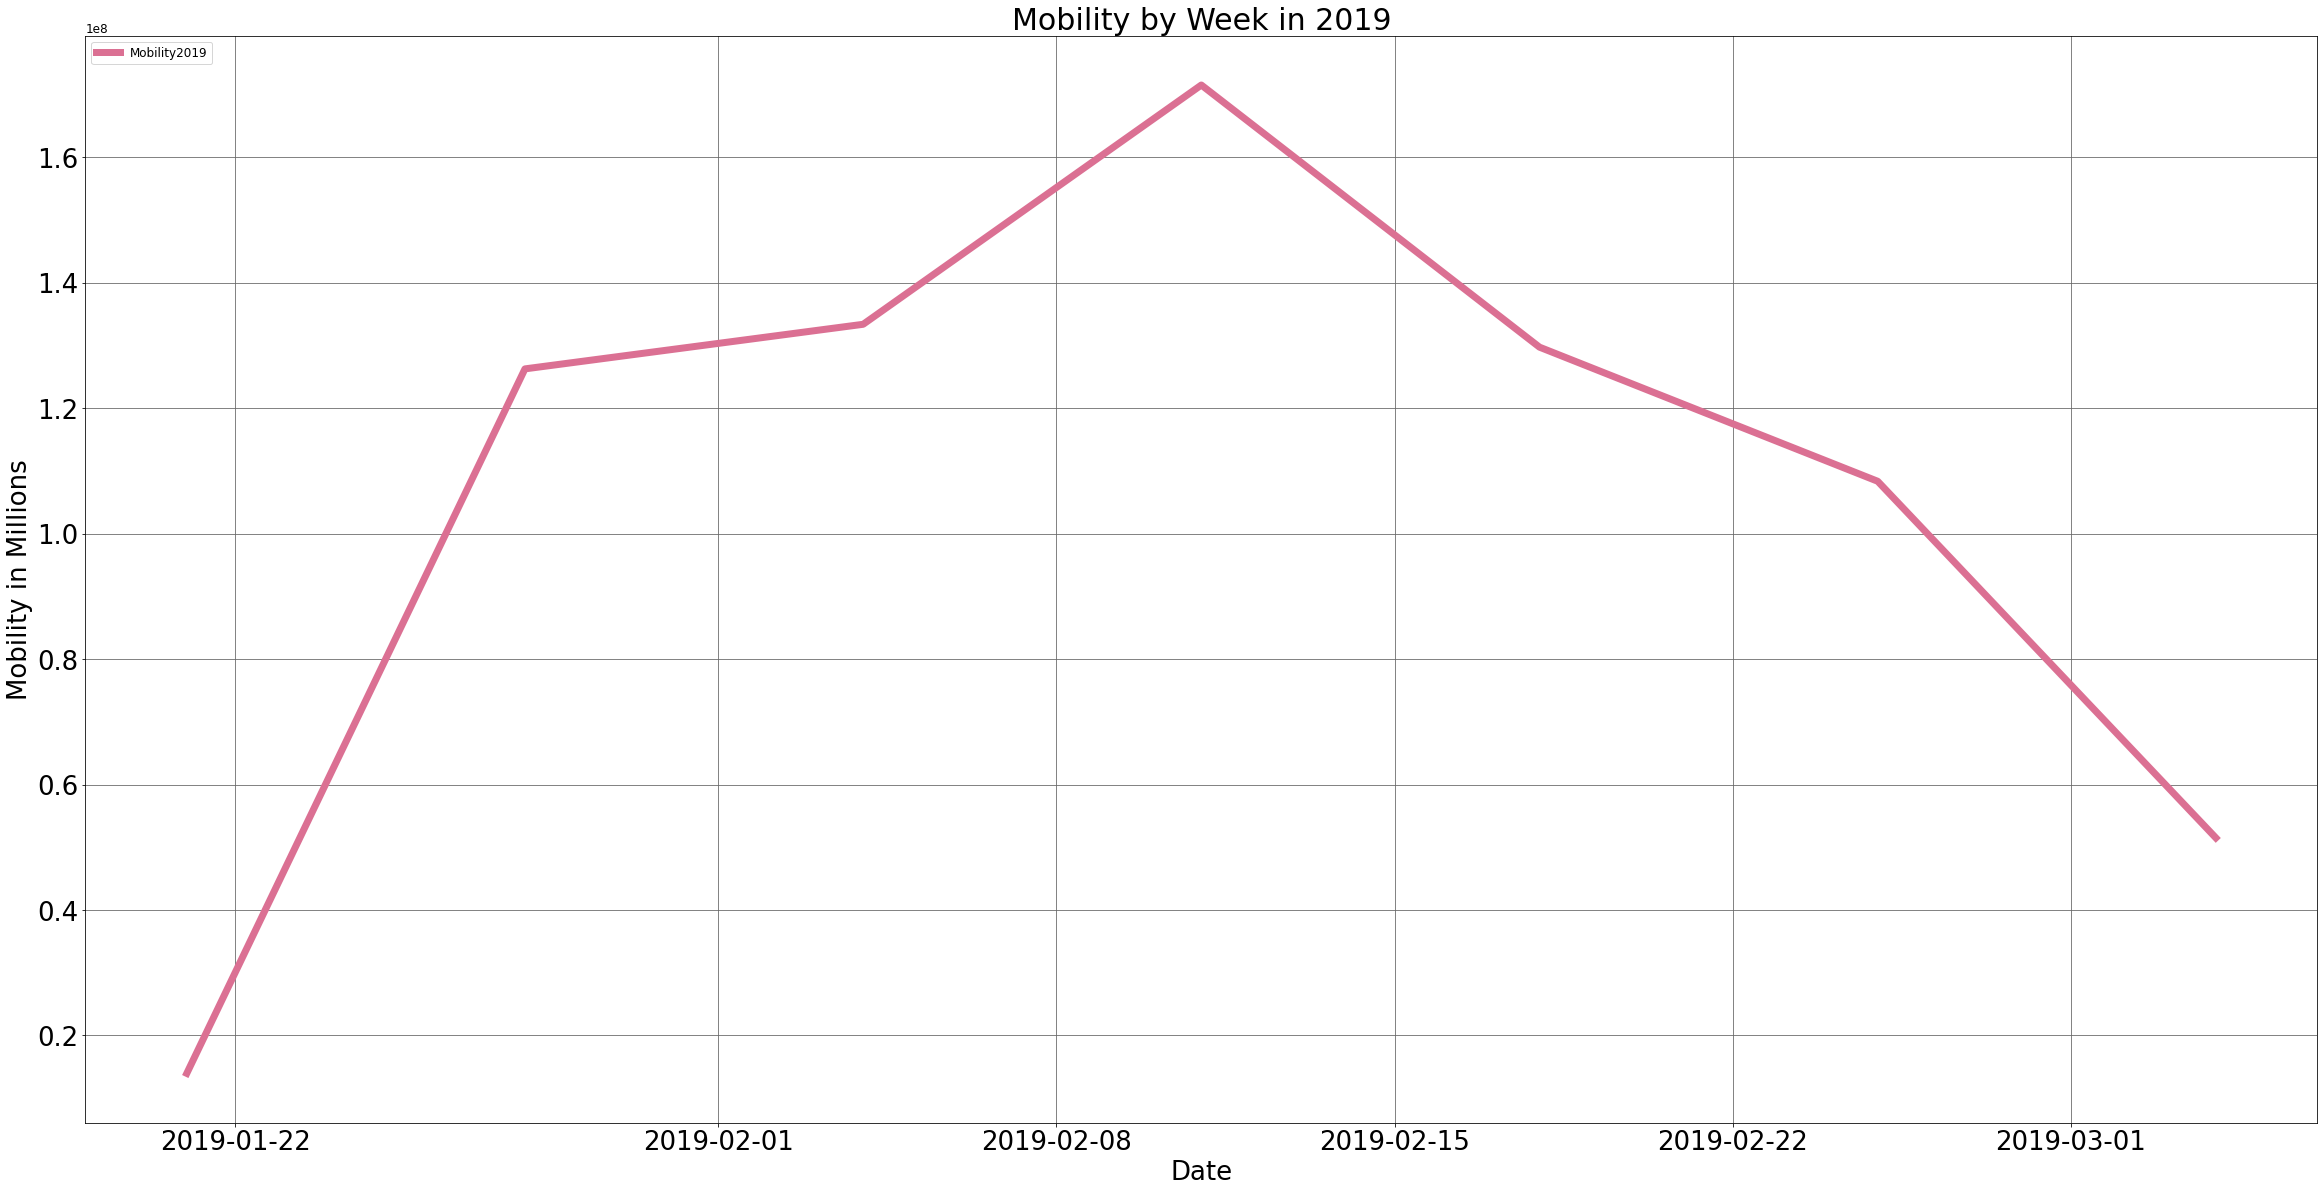

In [72]:
# time series plot by weeks
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(40, 20))
df_dateW.reset_index()
# Specify how our lines should look
ax.plot(df_dateW.Date, df_dateW.Mobility, color='palevioletred', label='Mobility2019',linewidth = 7)
# Same as above
ax.set_xlabel('Date', fontsize=26)
ax.set_ylabel('Mobility in Millions', fontsize=26)
ax.set_title('Mobility by Week in 2019', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/Mobility_by_week_2019.png')
ax.legend(loc='upper left');

In [191]:
# Creating file to utilise both city ids and value with date in a visualization
df4=df_mapping.drop(['origin_province','origin_city','dest_province','dest_city'],axis=1)
df4.head()

,city_id_o,city_id_d,Date,Val
160,370600,610900,2019-01-21,112
161,370600,610900,2019-01-22,67
162,370600,610900,2019-01-23,113
163,370600,610900,2019-01-24,100
164,370600,610900,2019-01-25,75


In [192]:
# Reordering the dataframe for better layout 
cols_to_order=['city_id_o','city_id_d','Val','Date']
new_columns = cols_to_order + (df4.columns.drop(cols_to_order).tolist())
df4=df4[new_columns]
df4.head()

,city_id_o,city_id_d,Val,Date
160,370600,610900,112,2019-01-21
161,370600,610900,67,2019-01-22
162,370600,610900,113,2019-01-23
163,370600,610900,100,2019-01-24
164,370600,610900,75,2019-01-25


In [193]:
#df4.groupby(['origin_city','dest_city','Date'])['Val'].sum()
df4['Date'] = pd.to_datetime(df4['Date']).dt.strftime('%Y-%m-%d')
df4.head()

,city_id_o,city_id_d,Val,Date
160,370600,610900,112,2019-01-21
161,370600,610900,67,2019-01-22
162,370600,610900,113,2019-01-23
163,370600,610900,100,2019-01-24
164,370600,610900,75,2019-01-25


In [194]:
old_names = df4.columns.tolist()
old_names

['city_id_o', 'city_id_d', 'Val', 'Date']

In [195]:
new_names=['origin','dest','count','time']

In [196]:
df4 = df4.rename(columns=dict(zip(old_names, new_names))) 
df4.head()

,origin,dest,count,time
160,370600,610900,112,2019-01-21
161,370600,610900,67,2019-01-22
162,370600,610900,113,2019-01-23
163,370600,610900,100,2019-01-24
164,370600,610900,75,2019-01-25


In [197]:
#saving the csv for mapping
#df4.to_csv('./Data/flows2019.csv',index=False)

In [198]:
#saving the csv for mapping
#df_finalW.to_csv('./Data/mapping_visual2019by_weel.csv',index=False)

In [199]:
df_map=df_mapping.groupby(['origin_city','city_id_o']).agg({'Val':['sum']}).reset_index()
df_map.head()

,origin_city,city_id_o,Val
,,,sum
0,of Yantai,370600,2043953
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,452222
2,Aksu region,652900,346014
3,Ali area,542500,5924
4,Altay region,654300,177669


In [200]:
df_map.columns=['origin_city','city_id_o','Val']
df_map.head()

,origin_city,city_id_o,Val
0,of Yantai,370600,2043953
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,452222
2,Aksu region,652900,346014
3,Ali area,542500,5924
4,Altay region,654300,177669


In [201]:
df_map.columns

Index(['origin_city', 'city_id_o', 'Val'], dtype='object')

In [202]:
df_map.dtypes

origin_city    object
city_id_o      object
Val             int32
dtype: object

In [203]:
df_map['city_id_o']=df_map['city_id_o'].astype(int)

In [204]:
df_map.dtypes

origin_city    object
city_id_o       int32
Val             int32
dtype: object

#### Slight data manipulation because the 2019 file does not have latitude and longitude

In [205]:
# loading locations file
df_loc = pd.read_csv('./Data/locations.csv')
df_loc.head()

,id,name,lat,lon
0,370600,of Yantai,37.4648,121.4256
1,513200,Aba Tibetan and Qiang Autonomous Prefecture,31.9026,102.2204
2,652900,Aksu region,41.1688,80.2620
3,542500,Ali area,32.5030,80.0960
4,654300,Altay region,47.8536,88.1364


In [206]:
df_loc.dtypes

id        int64
name     object
lat     float64
lon     float64
dtype: object

In [207]:
df_map_orig=pd.merge(df_map, df_loc, left_on='city_id_o', right_on='id', how='left').drop(['id','name'],axis=1)
df_map_orig.head()

,origin_city,city_id_o,Val,lat,lon
0,of Yantai,370600,2043953,37.4648,121.4256
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,452222,31.9026,102.2204
2,Aksu region,652900,346014,41.1688,80.2620
3,Ali area,542500,5924,32.5030,80.0960
4,Altay region,654300,177669,47.8536,88.1364


In [208]:
df_map_orig.isna().sum()

origin_city    0
city_id_o      0
Val            0
lat            0
lon            0
dtype: int64

In [209]:
df_map_orig.shape

(366, 5)

In [210]:
df_maps=df_mapping.groupby(['dest_city','city_id_d']).agg({'Val':['sum']}).reset_index()
df_maps.head()

,dest_city,city_id_d,Val
,,,sum
0,of Yantai,370600,2023113
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,484434
2,Aksu region,652900,368115
3,Ali area,542500,4858
4,Altay region,654300,149476


In [211]:
df_maps.columns=['dest_city','city_id_d','Val']
df_maps.head()

,dest_city,city_id_d,Val
0,of Yantai,370600,2023113
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,484434
2,Aksu region,652900,368115
3,Ali area,542500,4858
4,Altay region,654300,149476


In [212]:
df_maps.dtypes

dest_city    object
city_id_d    object
Val           int32
dtype: object

In [213]:
df_maps['city_id_d']=df_maps['city_id_d'].astype(int)

In [214]:
df_maps.dtypes

dest_city    object
city_id_d     int32
Val           int32
dtype: object

In [215]:
df_map_dest=pd.merge(df_maps, df_loc, left_on='city_id_d', right_on='id', how='left').drop(['id','name'],axis=1)
df_map_dest.head()

,dest_city,city_id_d,Val,lat,lon
0,of Yantai,370600,2023113,37.4648,121.4256
1,Aba Tibetan and Qiang Autonomous Prefecture,513200,484434,31.9026,102.2204
2,Aksu region,652900,368115,41.1688,80.2620
3,Ali area,542500,4858,32.5030,80.0960
4,Altay region,654300,149476,47.8536,88.1364


In [216]:
df_map_dest.isna().sum()

dest_city    0
city_id_d    0
Val          0
lat          0
lon          0
dtype: int64

In [217]:
#df_map_orig.to_csv('./Data/mapping_origin2019.csv',index=True)

In [218]:
#df_map_dest.to_csv('./Data/mapping_dest2019.csv',index=True)

### Total Mobility Count Analysis

In [219]:
# Aggregating by Origin City and Origin Province
orig_df=df2.drop(df2.iloc[:, 2:6], axis=1)
orig_df.head()

,origin_city,origin_province,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301
0,Qitaihe,Heilongjiang,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
1,Qitaihe,Heilongjiang,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9
2,Qitaihe,Heilongjiang,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Qitaihe,Heilongjiang,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,Qitaihe,Heilongjiang,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21


In [220]:
orig_df.shape

(128239, 42)

In [221]:
# just origin city
origin_city_df=orig_df.drop(columns=['origin_province'])
origin_city_df.head()

,origin_city,20190121,20190122,20190123,20190124,20190125,20190126,20190127,20190128,20190129,20190130,20190131,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301
0,Qitaihe,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
1,Qitaihe,5,12,10,12,10,27,17,8,13,15,11,8,6,9,5,15,14,9,10,5,9,12,9,9,10,11,10,8,14,7,11,11,10,9,12,7,9,6,8,9
2,Qitaihe,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Qitaihe,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
4,Qitaihe,8,8,11,9,19,8,4,5,2,11,7,8,9,14,10,23,16,37,35,31,42,36,36,30,30,47,28,23,16,21,26,27,25,22,27,27,12,19,27,21


In [222]:
bar_orig=origin_city_df.groupby('origin_city').sum().sum()

In [223]:
# Origin by weeks
by_wks=a.drop(a.iloc[:, 2:6], axis=1)
by_wks.head()

,origin_city,origin_province,Week1,Week2,Week3,Week4,Week5,Week6
0,Qitaihe,Heilongjiang,6,1,1,0,4,0
1,Qitaihe,Heilongjiang,93,70,67,69,74,39
2,Qitaihe,Heilongjiang,0,1,0,1,1,0
3,Qitaihe,Heilongjiang,3,1,0,0,0,2
4,Qitaihe,Heilongjiang,67,56,194,230,164,106


In [224]:
# just origin city
origin_city_wks=by_wks.drop(columns=['origin_province'])
origin_city_wks.head()

,origin_city,Week1,Week2,Week3,Week4,Week5,Week6
0,Qitaihe,6,1,1,0,4,0
1,Qitaihe,93,70,67,69,74,39
2,Qitaihe,0,1,0,1,1,0
3,Qitaihe,3,1,0,0,0,2
4,Qitaihe,67,56,194,230,164,106


In [225]:
bar_orig_wks=origin_city_wks.groupby('origin_city').sum().sum()

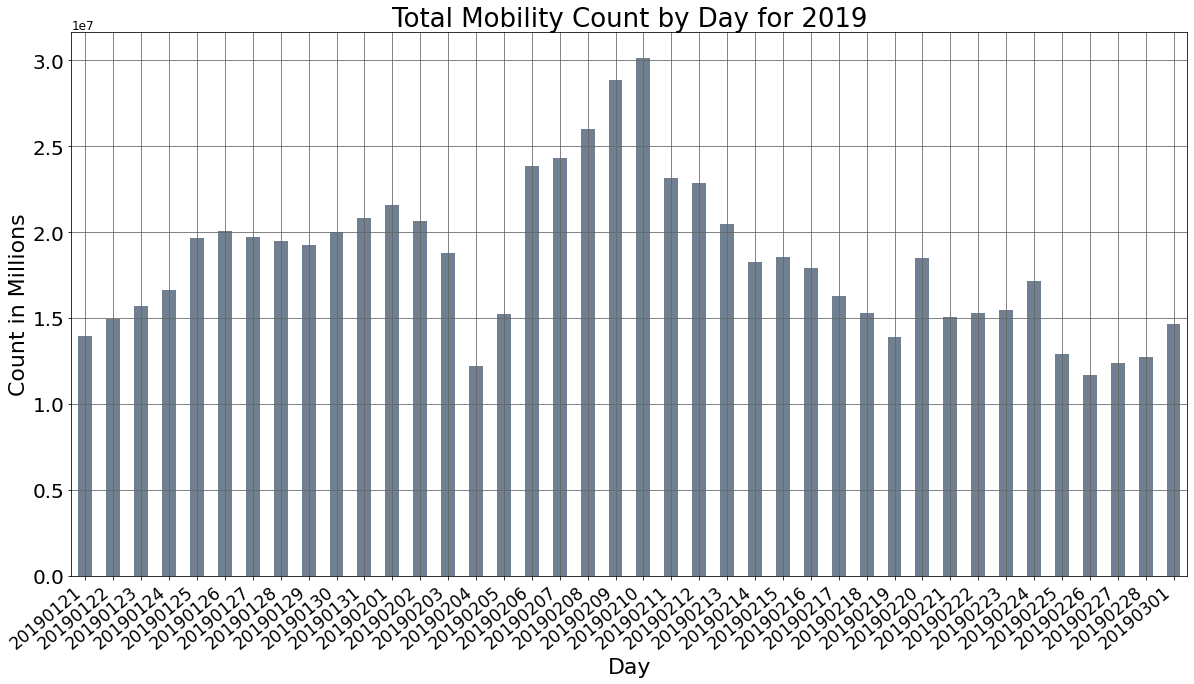

In [226]:
# Bar plot by mobility count for Day
ax=bar_orig.plot(kind='bar',color='slategrey')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
#formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
#ax.yaxis.set_major_formatter(formatter)
plt.title('Total Mobility Count by Day for 2019', fontsize=26)
plt.xlabel('Day', fontsize=22)
plt.ylabel('Count in Millions', fontsize=22)
#changing ylables ticks
#y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
#ax.set_yticklabels(y_value)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/total_origin_mobility_2019_By_Day.png') 
plt.show()


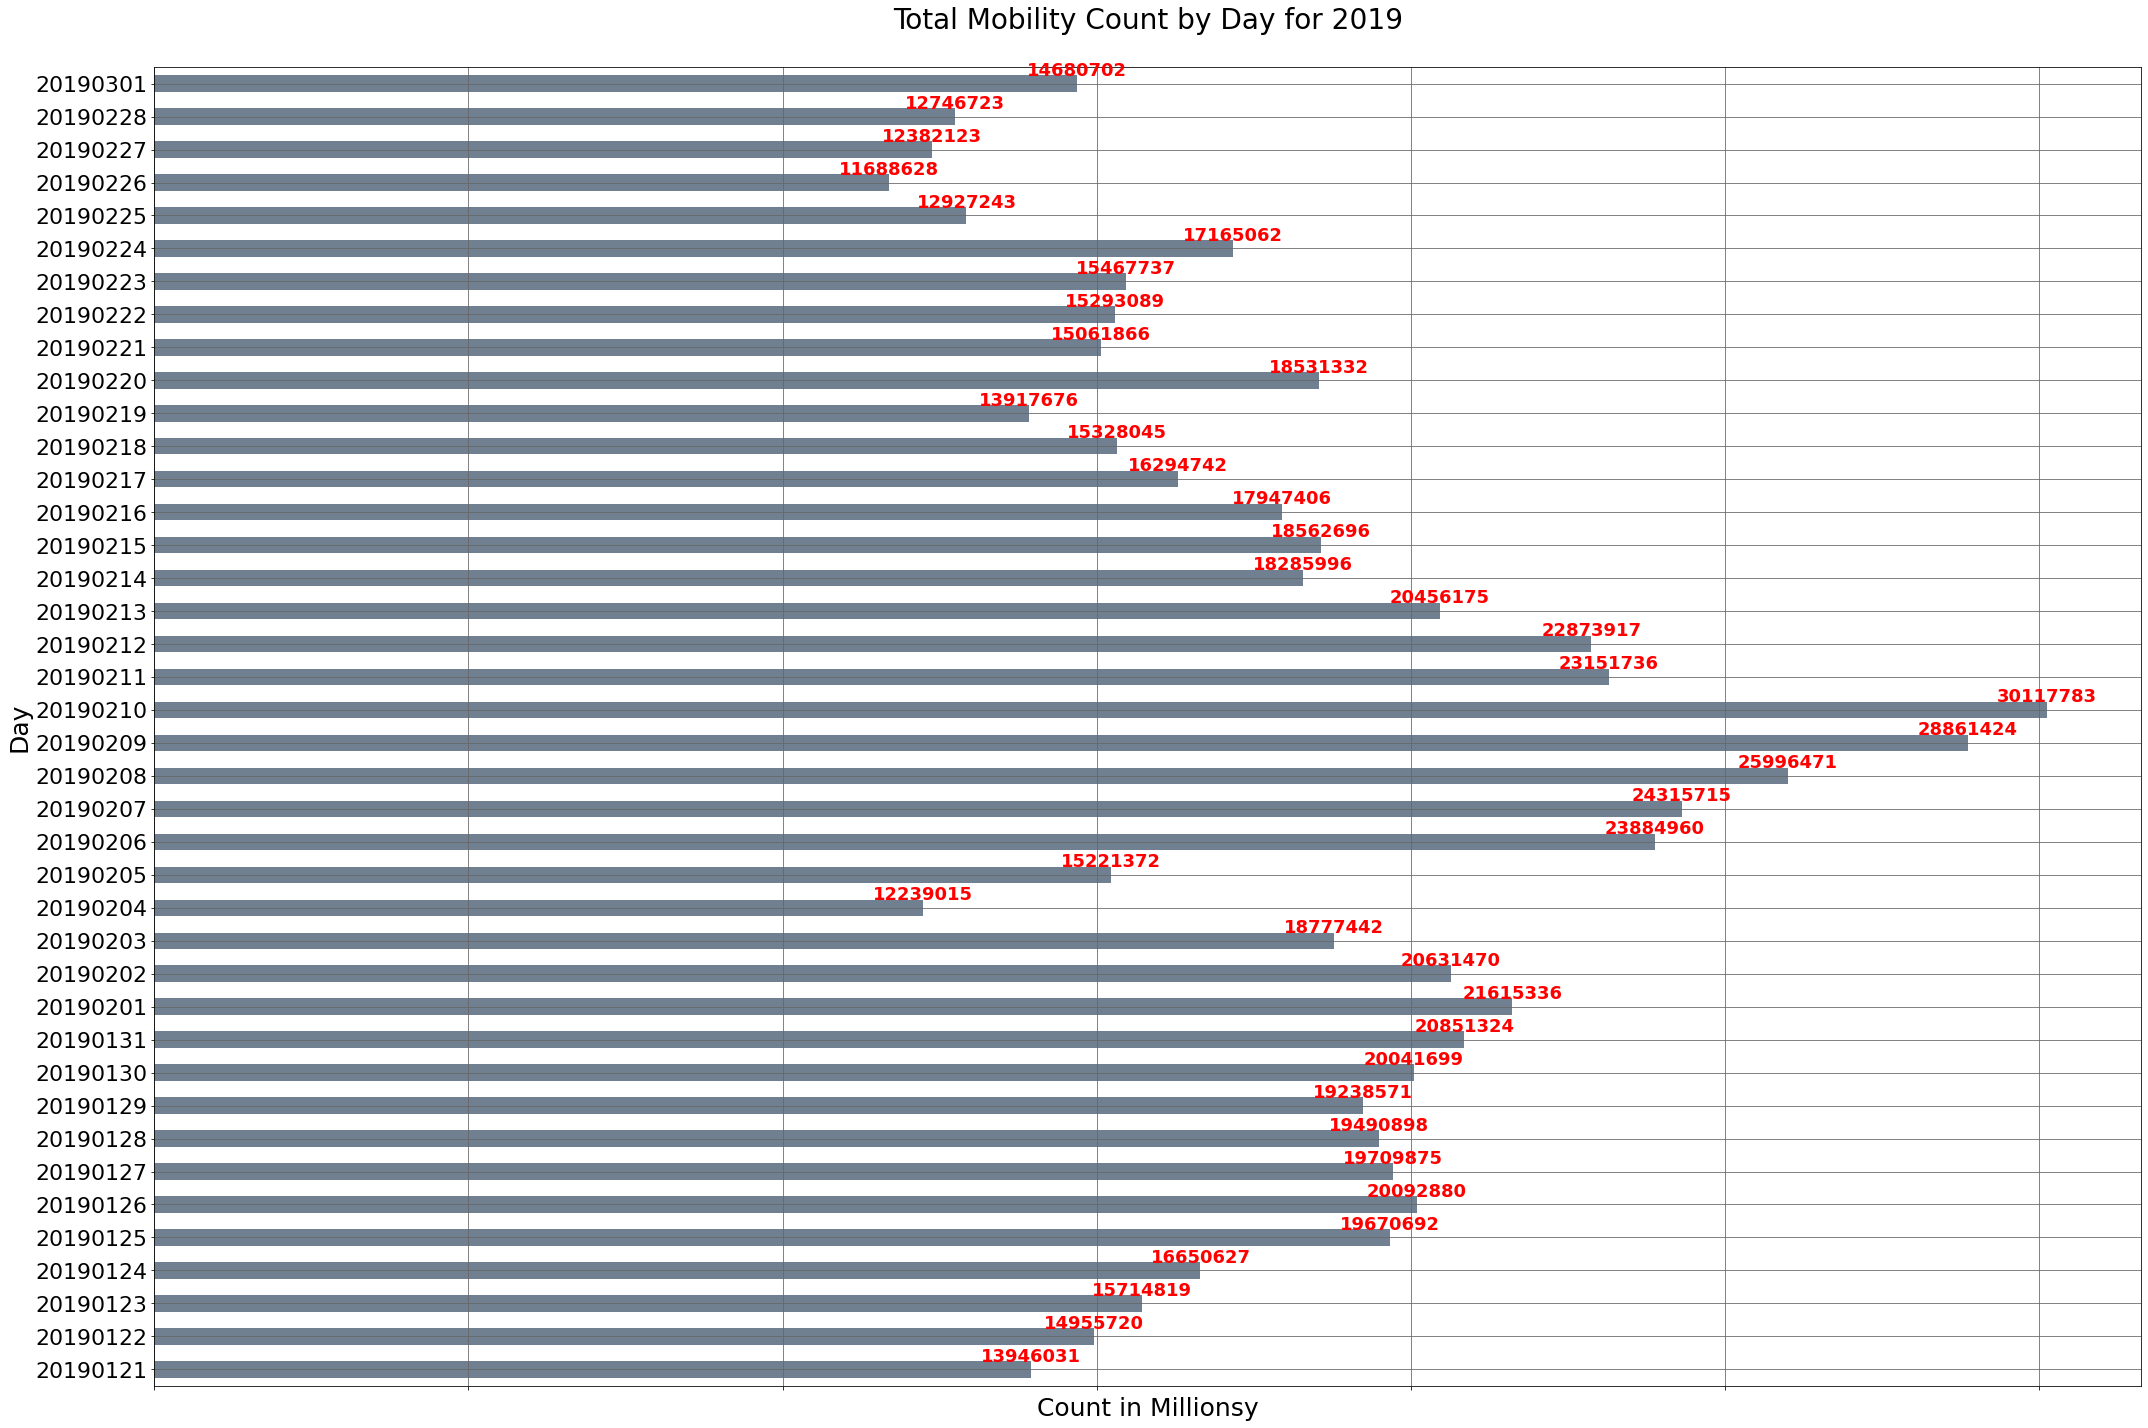

In [227]:
# bar plot for day
ax=bar_orig.plot(kind='barh',color='slategrey')
fig=plt.gcf().set_size_inches(30, 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
for i, v in enumerate(bar_orig):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold', fontsize=18,horizontalalignment='center')
plt.title('Total Mobility Count by Day for 2019\n', fontsize=28)
plt.xlabel('Count in Millionsy', fontsize=25)
plt.ylabel('Day', fontsize=25)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.yticks(fontsize=22)
plt.tight_layout()
#plt.savefig('./Media/total_origin_mobility_2019_By_Day_2.png') 
plt.show()

In [228]:
df2['20190222'].sum()

15293089

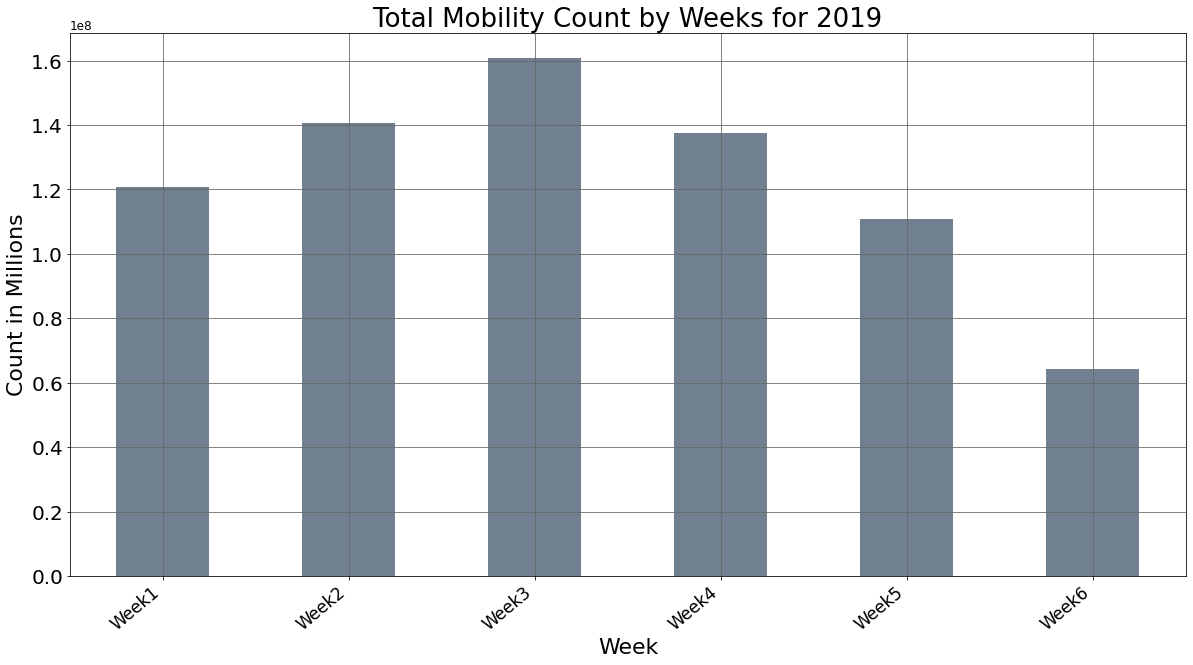

In [229]:
# bar plot by weeks
ax=bar_orig_wks.plot(kind='bar',color='slategrey')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Total Mobility Count by Weeks for 2019', fontsize=26)
plt.xlabel('Week', fontsize=22)
plt.ylabel('Count in Millions', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/total_origin_mobility_2019_By_Weeks.png') 
plt.show()


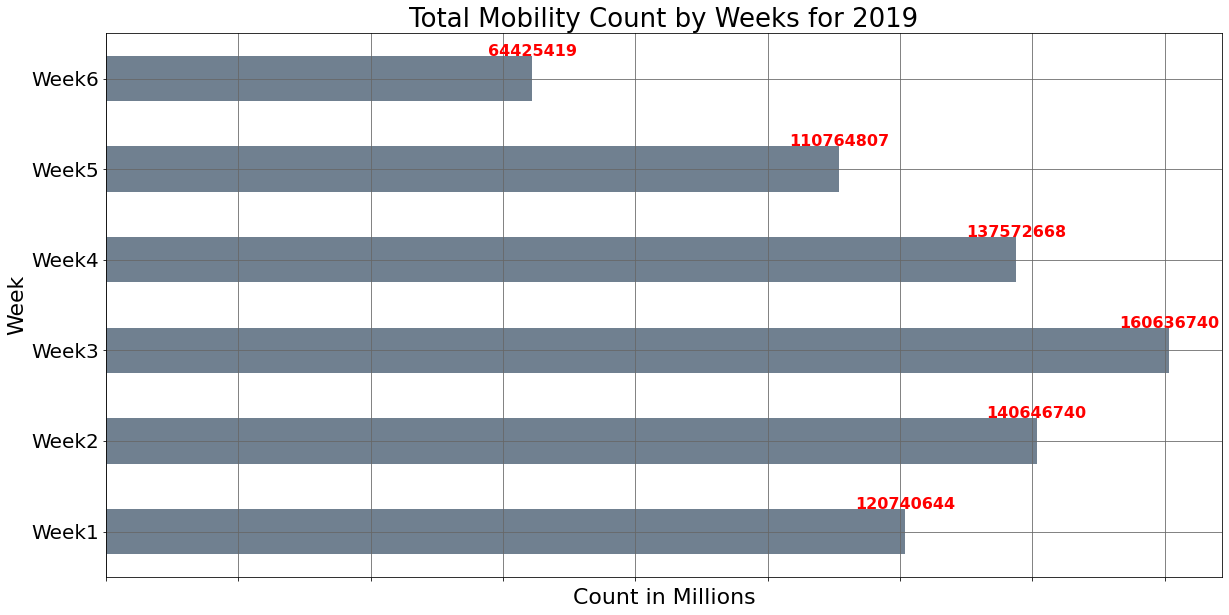

In [230]:
# bar plot by weeks (horizontal)
ax=bar_orig_wks.plot(kind='barh',color='slategrey')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
for i, v in enumerate(bar_orig_wks):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold', fontsize=16,horizontalalignment='center')
plt.title('Total Mobility Count by Weeks for 2019', fontsize=26)
plt.xlabel('Count in Millions', fontsize=22)
plt.ylabel('Week', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/total_origin_mobility_2019_By_Weeks_2.png') 
plt.show()


### Origin City Analysis

In [231]:
# grouping origin city by total sum daily
origin_city_aggreagted_by_day=origin_city_wks.groupby(['origin_city']).sum()
origin_city_aggreagted_by_day.head()

,Week1,Week2,Week3,Week4,Week5,Week6
origin_city,,,,,,
of Yantai,349809,441869,544493,335515,311593,191355
Aba Tibetan and Qiang Autonomous Prefecture,86232,80165,106477,91383,68777,43495
Aksu region,84157,69190,64153,61626,66397,47785
Ali area,2185,2150,846,1482,1778,1543
Altay region,35862,30230,40251,35151,32988,20580


In [232]:
# grouping to check the total sum of the values of movement for each origin province
o_prov=by_wks.groupby(['origin_province']).sum()
o_prov.head()

,Week1,Week2,Week3,Week4,Week5,Week6
origin_province,,,,,,
Anhui,4146044,5436294,8580563,8829892,6074171,2864078
Beijing,3640793,5580160,2480543,1994618,2080230,1655382
Chongqing,1236671,1931706,2724911,2343468,1617489,866757
Fujian,3679841,4136760,4177292,3849956,2850738,1539625
Gansu province,1444135,1635257,2210404,2106234,1846120,1011810


In [234]:
o_prov['origin_province']=o_prov.index

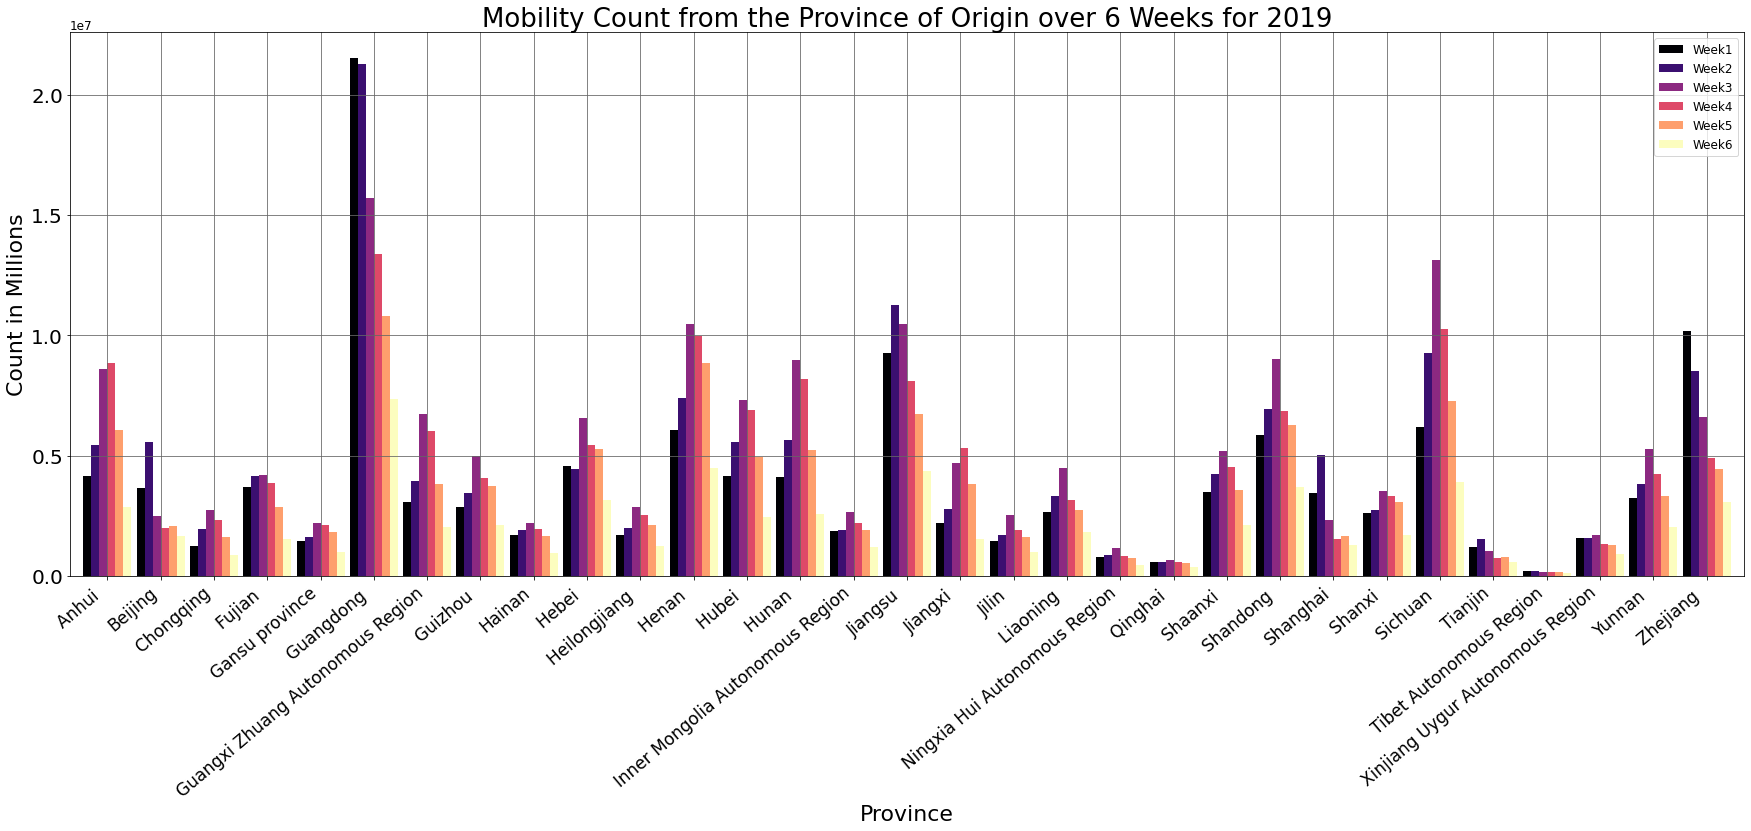

In [235]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling
ax=o_prov.plot(kind='bar',width=0.9,cmap='magma')
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count from the Province of Origin over 6 Weeks for 2019', fontsize=26)
plt.xlabel('Province', fontsize=22)
plt.ylabel('Count in Millions', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/origin_mobility_2019.png') 
plt.show()


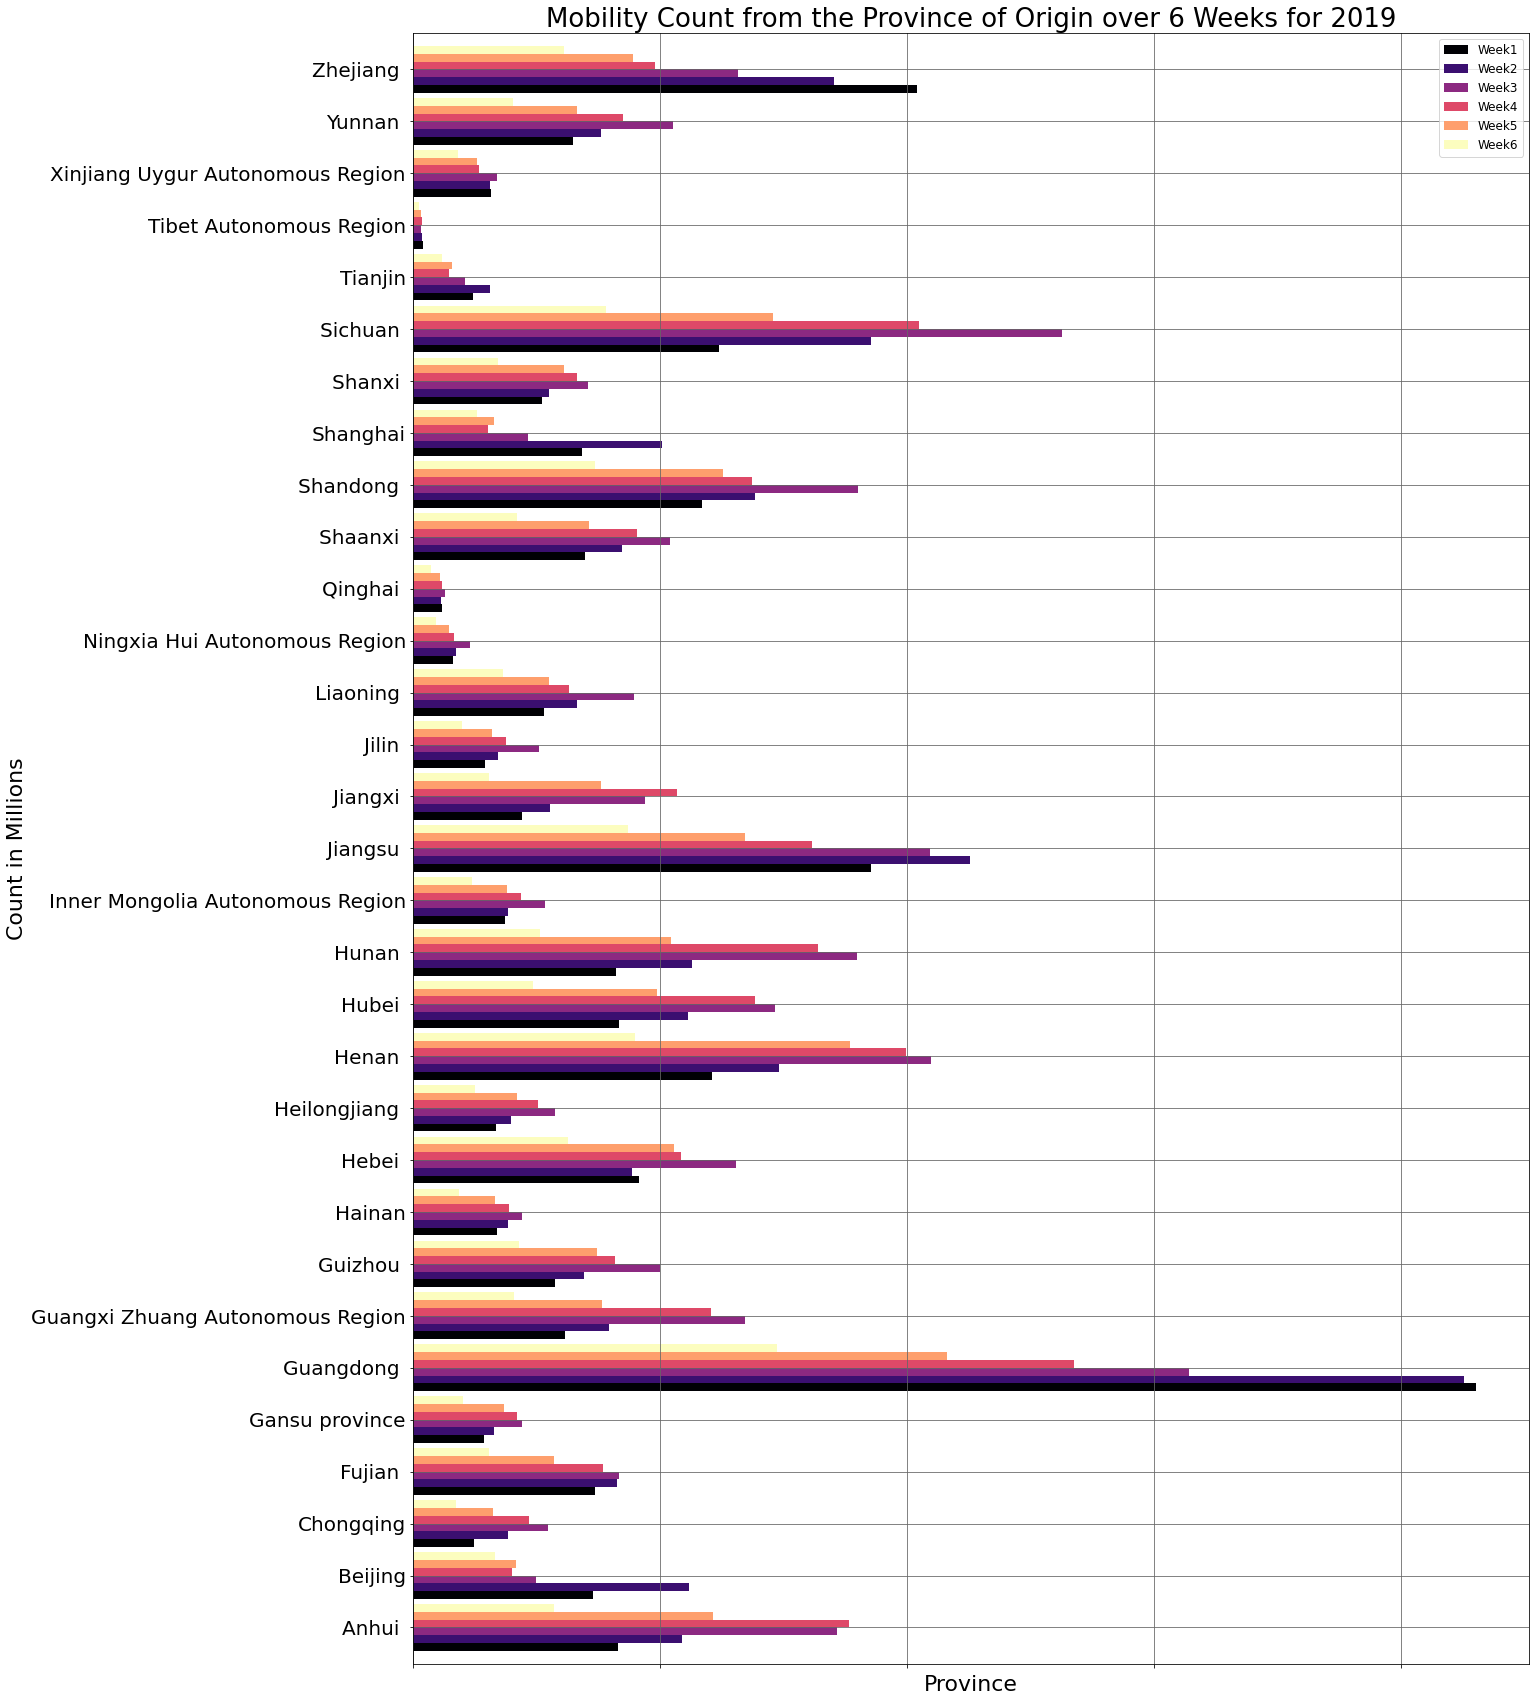

In [236]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling
ax=o_prov.plot(kind='barh',width=0.9,cmap='magma')
plt.gcf().set_size_inches(20, 30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count from the Province of Origin over 6 Weeks for 2019', fontsize=26)
plt.xlabel('Province', fontsize=22)
plt.ylabel('Count in Millions', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/origin_mobility_2019_2.png') 
plt.show()


In [237]:
# aggregating by weeks for origin city
df_orig=a.groupby(['origin_city']).sum()

In [238]:
a.groupby(['origin_province']).max()

,origin_city,city_id_o,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6
origin_province,,,,,,,,,,,
Anhui,Xuancheng,341800,Zunyi,Zhejiang,659009,133312,240890,220489,237336,146384,64601
Beijing,Beijing,110000,Zunyi,Zhejiang,659009,409799,397782,221422,281977,336873,292612
Chongqing,Chongqing,500000,Zunyi,Zhejiang,659009,125617,228221,333075,242942,145969,89165
Fujian,Zhangzhou,350900,Zunyi,Zhejiang,659009,156106,244127,203823,216906,150366,88710
Gansu province,Zhangye,623000,Zunyi,Zhejiang,659009,69124,108099,94156,104104,97198,48155
Guangdong,Zhuhai city,445300,Zunyi,Zhejiang,659009,559990,349294,268547,387011,475174,377307
Guangxi Zhuang Autonomous Region,Yulin,451400,Zunyi,Zhejiang,659009,92059,166014,173230,125375,98455,52268
Guizhou,Zunyi,522700,Zunyi,Zhejiang,659009,171112,262703,281730,247641,225947,123648
Hainan,Wuzhishan,469030,Zunyi,Zhejiang,659009,63378,93049,88465,67707,71080,35464


In [239]:
df_orig.head()

,city_id_o,Week1,Week2,Week3,Week4,Week5,Week6
origin_city,,,,,,,
of Yantai,134527800,349809,441869,544493,335515,311593,191355
Aba Tibetan and Qiang Autonomous Prefecture,172948400,86232,80165,106477,91383,68777,43495
Aksu region,231126600,84157,69190,64153,61626,66397,47785
Ali area,113382500,2185,2150,846,1482,1778,1543
Altay region,214610400,35862,30230,40251,35151,32988,20580


### Departure City Analysis

In [240]:
dep=a.drop(df2.iloc[:, 0:3], axis=1)
dep.head()

,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6
0,Wanning,Hainan,469006,6,1,1,0,4,0
1,Sanya,Hainan,460200,93,70,67,69,74,39
2,Sanming,Fujian,350400,0,1,0,1,1,0
3,Sanmenxia,Henan,411200,3,1,0,0,0,2
4,Shanghai,Shanghai,310000,67,56,194,230,164,106


In [241]:
dep.drop('city_id_d',axis=1,inplace=True)

In [242]:
dep.head()

,dest_city,dest_province,Week1,Week2,Week3,Week4,Week5,Week6
0,Wanning,Hainan,6,1,1,0,4,0
1,Sanya,Hainan,93,70,67,69,74,39
2,Sanming,Fujian,0,1,0,1,1,0
3,Sanmenxia,Henan,3,1,0,0,0,2
4,Shanghai,Shanghai,67,56,194,230,164,106


In [244]:
dep_bar=dep.groupby('dest_city').sum().sum()
dep_bar

Week1    120740644
Week2    140646740
Week3    160636740
Week4    137572668
Week5    110764807
Week6     64425419
dtype: int64

In [245]:
d_prov=dep.groupby(['dest_province']).sum()
d_prov.head()

,Week1,Week2,Week3,Week4,Week5,Week6
dest_province,,,,,,
Anhui,7095335,9678420,7685487,5621318,4132655,2330223
Beijing,2322520,1691999,4139897,4346897,3649468,2111502
Chongqing,2023684,2157006,2723452,1912960,1283188,678324
Fujian,2937364,3830426,4430376,4038939,3151889,1685595
Gansu province,1738214,2067947,2023908,1820223,1672094,926554


In [246]:
d_prov['dest_province']=d_prov.index

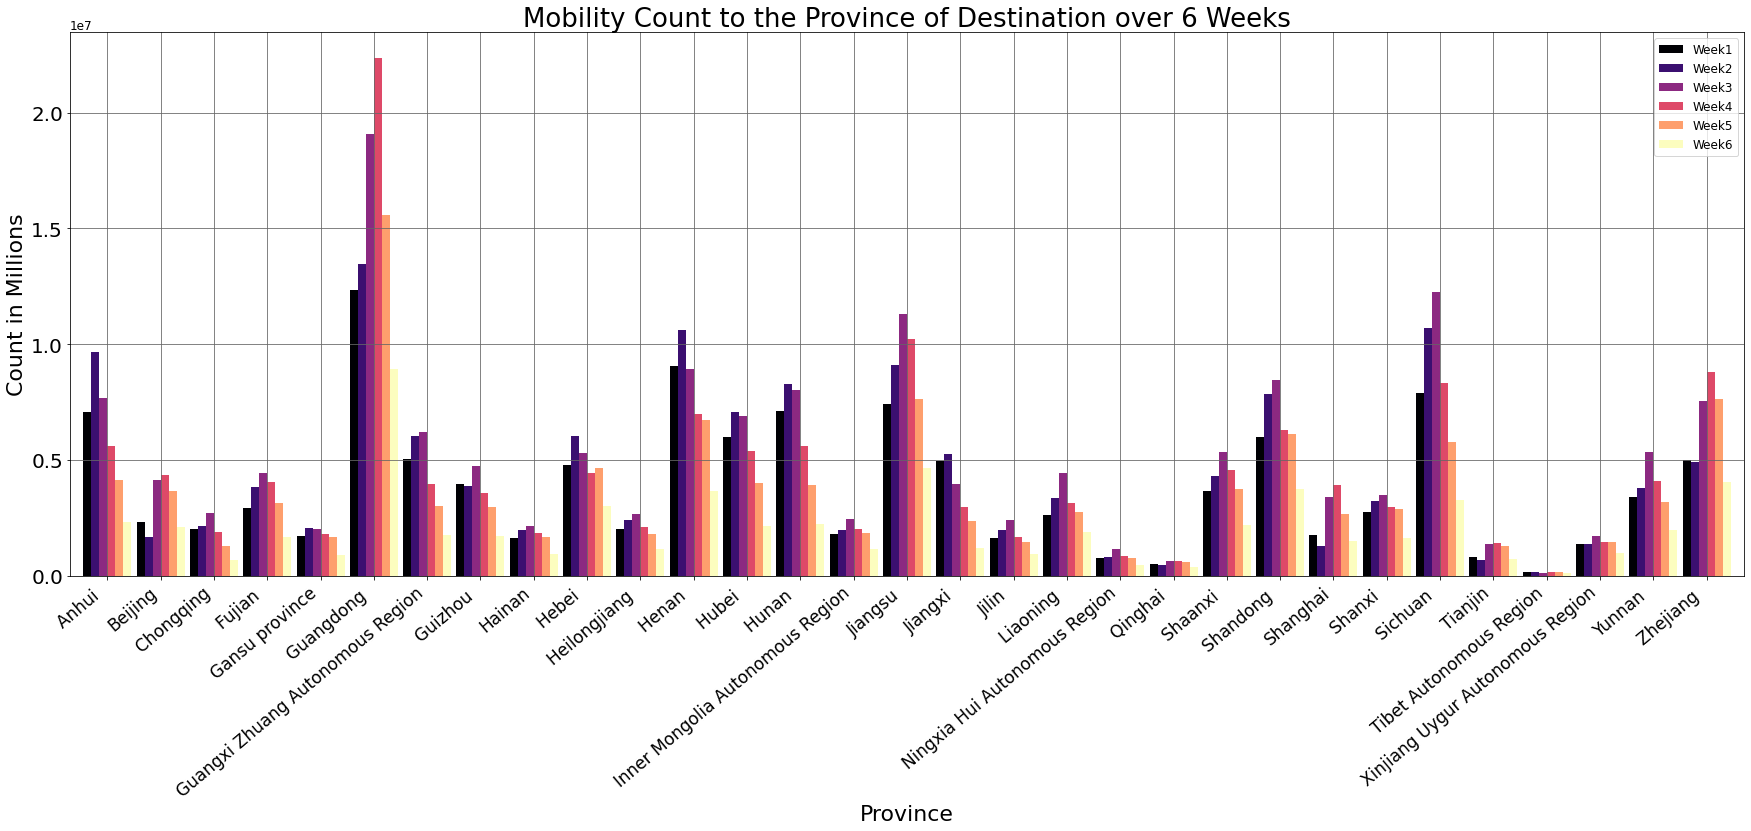

In [249]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='bar',width=0.9,cmap='magma')
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count to the Province of Destination over 6 Weeks', fontsize=26)
plt.xlabel('Province', fontsize=22)
plt.ylabel('Count in Millions', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/destination_mobility_2019.png')
plt.show()


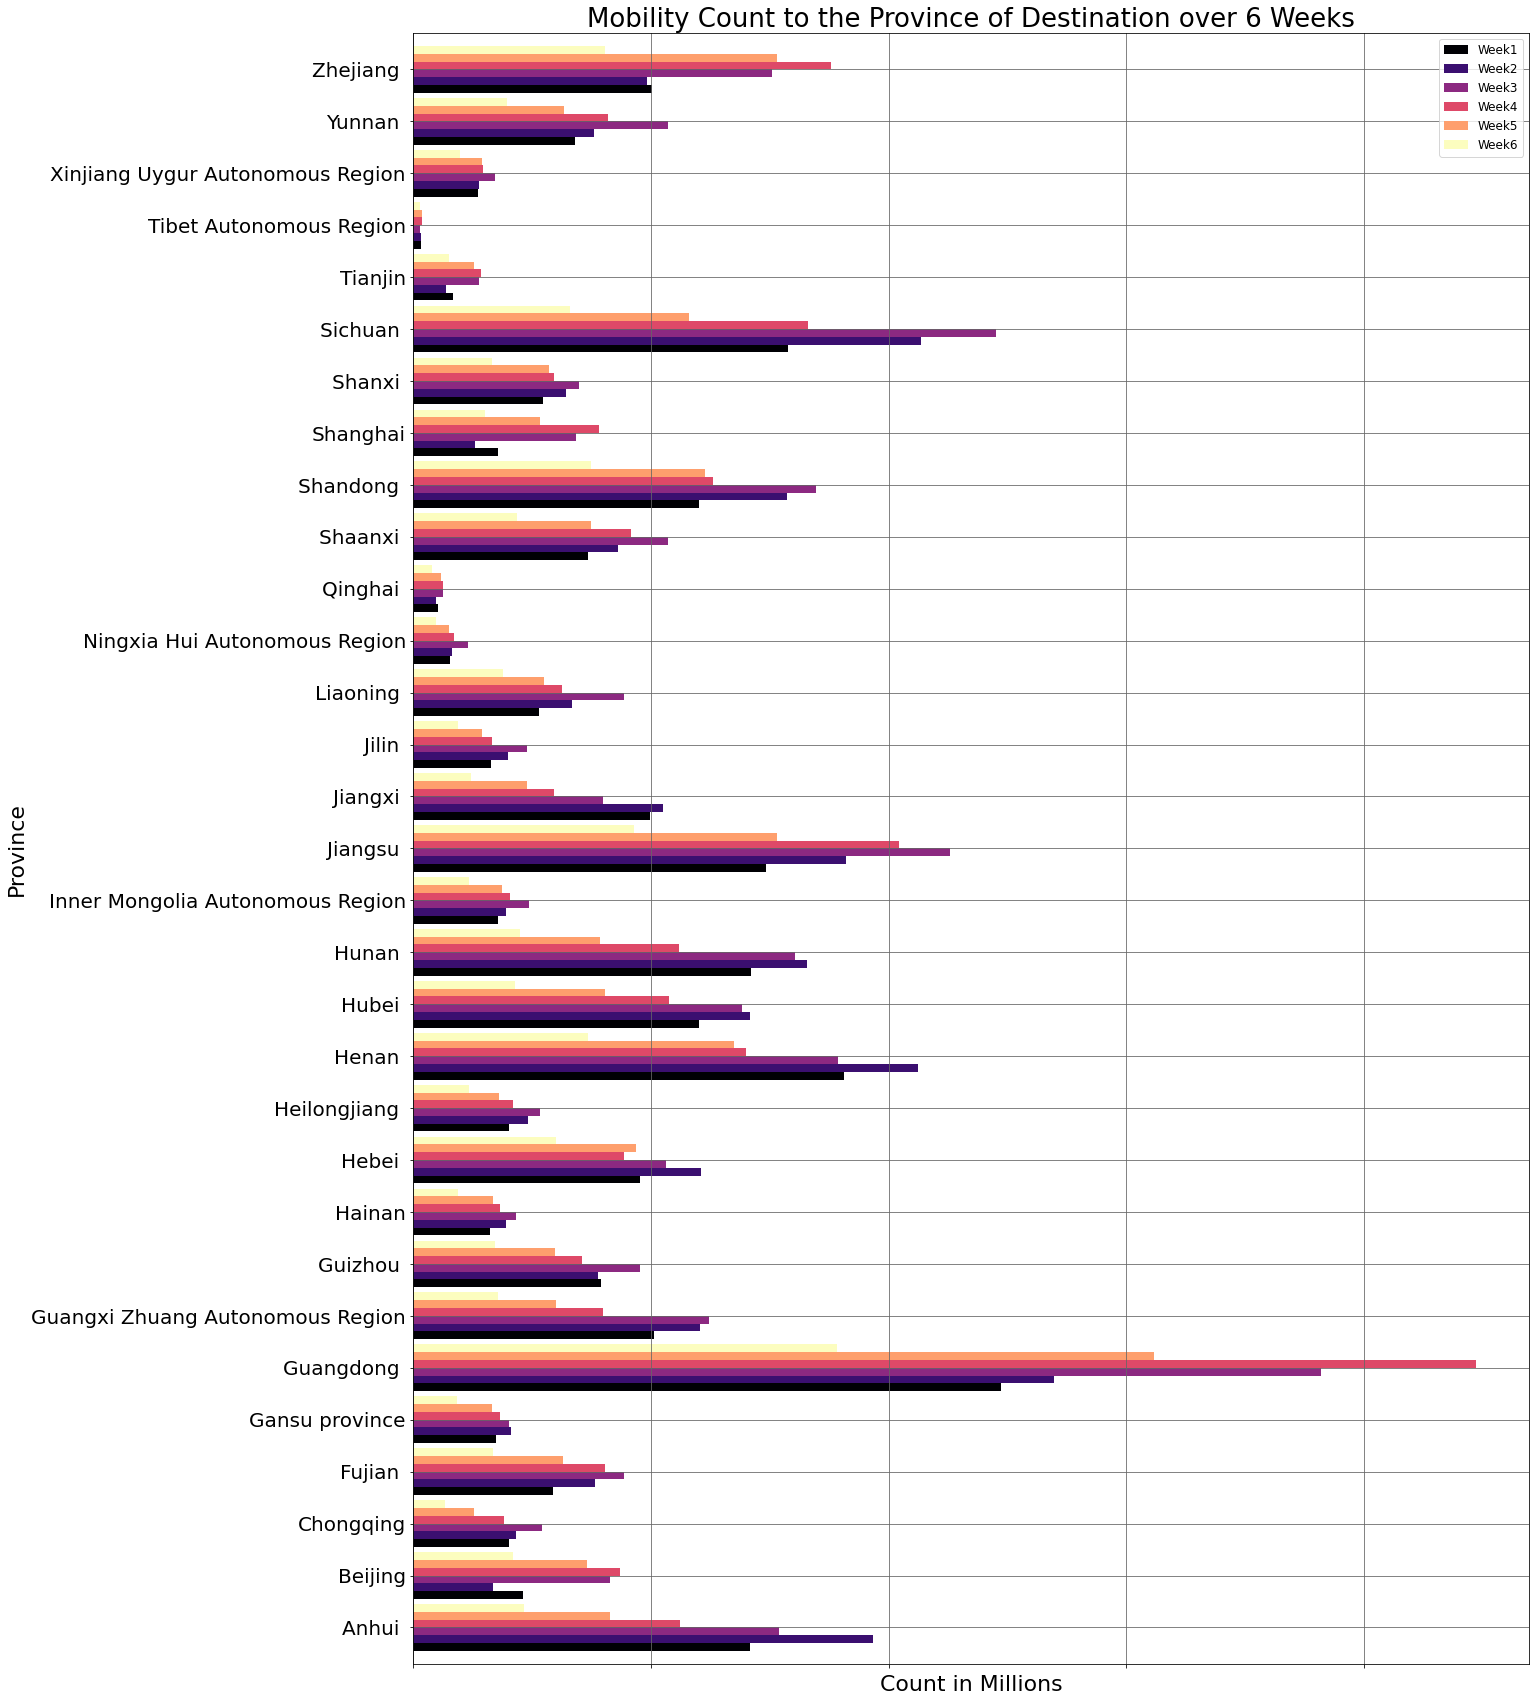

In [254]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='barh',width=0.9,cmap='magma')
plt.gcf().set_size_inches(20, 30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count to the Province of Destination over 6 Weeks', fontsize=26)
plt.xlabel('Count in Millions', fontsize=22)
plt.ylabel('Province', fontsize=22)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
#plt.savefig('./Media/destination_mobility_2019_2.png')
plt.show()

### Saving data for Self Organizing Maps

In [251]:
mod=a.copy()
mod.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6
0,Qitaihe,Heilongjiang,230900,Wanning,Hainan,469006,6,1,1,0,4,0
1,Qitaihe,Heilongjiang,230900,Sanya,Hainan,460200,93,70,67,69,74,39
2,Qitaihe,Heilongjiang,230900,Sanming,Fujian,350400,0,1,0,1,1,0
3,Qitaihe,Heilongjiang,230900,Sanmenxia,Henan,411200,3,1,0,0,0,2
4,Qitaihe,Heilongjiang,230900,Shanghai,Shanghai,310000,67,56,194,230,164,106


In [252]:
#saving the file
#mod.to_csv('./Data/som2019.csv', index=False)